# PA006 - Bank Marketing  Strategy

# Solution Planning ( IOT )

## Imput

 I have been as a Data Scientis Consultant to build a data product that create a customers segmentattion which will handle the marketing strategy and the following expected results from consultancy:
        
        
- 1. Create customer segmentation based on clear selection criteria.
- 2. Make customer segmentation accessible to the operations team.
- 3. Teach the operations team how to use the solution.
- 4. Transfer knowledge to international bank Data Scientists.
- 5. Recommend 3 business levers for each customer segment. 


## Output

- Tools:
    - Jupyter Notebook
    - Metabase
    - Streamlit
    
    
- URL to the Operation team make tests;
- Download of selected data;


# Tasks

- Data Descriptive:
    - NA's replace
    - Outliers Detection
    
    
- EDA:
    - Univariate Analysis
    - Bivariate Analysis
    - Outliers Detection
    - Feature Selection
    - Study of Space
    - Embeding Definition
    
- Machine Learning Training:
    - Performance Analysis
    - Clustering Analysis
    - Define clustering number
    
- EDA - Insights:
    - Expain the segmentattion characters
    
- Table to store the clustered clients
- Creat the production script


- AWS Architecture:
    - S3 for store the data
    - EC2 for store the ETL and visualization tool.
    - DB to store the table 
    - Cronjob
    - Papermill

# 0.1 Imports

In [1]:
import inflection
import warnings

import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt

from  sklearn  import  datasets        as dt
from  sklearn  import  cluster         as c
from  sklearn  import  metrics         as m
from  sklearn  import  manifold        as mn
from  sklearn  import  decomposition   as dd
from  sklearn  import  preprocessing   as pp
from  sklearn  import  mixture         as mx
from  sklearn  import  ensemble        as en
from  sklearn  import  model_selection as ms
from  sklearn  import  metrics as mt

from IPython.display             import Image
from bayes_opt                   import BayesianOptimization
from bayes_opt                   import UtilityFunction
from matplotlib                  import gridspec
from sklearn.neighbors           import NearestNeighbors
from pandas_profiling            import ProfileReport
from IPython.core.display        import HTML

warnings.filterwarnings ('ignore')


# 0.2 Helper functions

In [2]:
def jupyter_settings(): 
    %matplotlib inline 
    #%matplotlib notebook
    %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
     
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option ('display.expand_frame_repr', False)
    
    sns.set()

%matplotlib inline 
%matplotlib notebook

plt.style.use('bmh')
plt.rcParams['figure.figsize'] = [25, 12]
plt.rcParams['font.size'] = 24


display( HTML( '<style>.container { width:100% !important; }</style>') )
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option ('display.expand_frame_repr', False)

sns.set()

jupyter_settings()


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# 1.0 Data Discriptive

## 1.1 Load dataset

In [61]:
df1 = pd.read_csv( '/Users/adriele/Documents/repos/pa006/dataset/bank.csv')

## 1.2 Rename columns

In [62]:
df1.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [63]:
df1.columns = [ 'id', 'balance', 'balance_freq', 'purchases','one_purchases', 'install_purchases', 'cash_adv',
       'purchases_freq', 'one_purchases_freq', 'purchases_install_freq', 'cash_adv_freq',
       'cash_adv_trx', 'purchases_trx', 'credit_limit', 'payments','min_pay', 'prc_full_pay', 'tenure']



## 1.3 Data Dimension

In [64]:
print( 'Number of Cols {}'.format( df1.shape[1] ) )
print( 'Number of Rows {}'.format( df1.shape[0] ) )

Number of Cols 18
Number of Rows 8950


## 1.4 Check NA

In [65]:
df1.isna().sum()

id                          0
balance                     0
balance_freq                0
purchases                   0
one_purchases               0
install_purchases           0
cash_adv                    0
purchases_freq              0
one_purchases_freq          0
purchases_install_freq      0
cash_adv_freq               0
cash_adv_trx                0
purchases_trx               0
credit_limit                1
payments                    0
min_pay                   313
prc_full_pay                0
tenure                      0
dtype: int64

## 1.5 Replace NA

In [66]:
df1['min_pay'] = df1['min_pay'].replace(np.nan, 0)
df1=df1.dropna()


In [67]:
df1.isna().sum()

id                        0
balance                   0
balance_freq              0
purchases                 0
one_purchases             0
install_purchases         0
cash_adv                  0
purchases_freq            0
one_purchases_freq        0
purchases_install_freq    0
cash_adv_freq             0
cash_adv_trx              0
purchases_trx             0
credit_limit              0
payments                  0
min_pay                   0
prc_full_pay              0
tenure                    0
dtype: int64

## 1.6 Data Types

In [68]:
df1.dtypes

id                         object
balance                   float64
balance_freq              float64
purchases                 float64
one_purchases             float64
install_purchases         float64
cash_adv                  float64
purchases_freq            float64
one_purchases_freq        float64
purchases_install_freq    float64
cash_adv_freq             float64
cash_adv_trx                int64
purchases_trx               int64
credit_limit              float64
payments                  float64
min_pay                   float64
prc_full_pay              float64
tenure                      int64
dtype: object

In [69]:
df1['id'] = df1['id'].replace('C', '', regex=True).astype( int)

In [70]:
df1.dtypes

id                          int64
balance                   float64
balance_freq              float64
purchases                 float64
one_purchases             float64
install_purchases         float64
cash_adv                  float64
purchases_freq            float64
one_purchases_freq        float64
purchases_install_freq    float64
cash_adv_freq             float64
cash_adv_trx                int64
purchases_trx               int64
credit_limit              float64
payments                  float64
min_pay                   float64
prc_full_pay              float64
tenure                      int64
dtype: object

# 1.7  Descriptive Startisc

Location Estimate:

    - Mean = Soma of all value divided for the quantity of value.
    - Median = middle value - midpoint value when the dataset is divided into 2 parts.
    - Minimum = The lower value on dataset.
    - Maximum = The big value on dataset.
    
    
Variable Estimate:

    - Deviation = Variable estimete that meansure the values dispersion from dataset around a location estimate (mean).  
    - Standard Deviation = Is the points averange distance around a locatio metric, tha's the mean. + the variance calculete  
    - Variance = Is the calculation of squared deviations by subtracting 1
    - Range
   

## Skewness

- Is the dimersion of a data distribution, copared a normal distribution, and can be: positieve or negative / to right or to left / low or high.
    
        - Close to  0 = Normal distribution;
        - Close to -1 = Negative distribution;
        - Close to +1 = Positive distribution;
        
        - Median > Mean = Tail shifted to the left = Negative skweness;
        10 - 15 = -5
        - Median < Mean = Tail shifted to the right = Positive skweness;
        10 - 8 = 2

## Kurtoses 

- Show the long tails ( the probability of extrame values appear, even its max or min) 

## Quantile

- Any of 3 values that separete a dataset, ordely in 4 equal parts, each part represent 1/4  from origina sample.



    - First Quantile  (bottom) = Is the part of dataset that delimit 25% from dataset;
    - Second Quantile (middle) = Is the part of dataset that delimit 50% from dataset;
    - Third Quantile  ( top )  = Is the part of dataset that delimit 75% from dataset;

## Percentile

- Are the meansures that divide a ordely sample in 100 equal parts.

    - Perc. 01 = 1% from dataset.
    - Perc. 10 = 10% from dataset.
    - Perc. 25 = 25% from dataset => First Quantile.
    - Perc. 50 = 50% from dataset => Second Quantile.
    - Perc. 75 = 75% from dataset => Third Quantile.

In [71]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=[ 'int64', 'float64', 'datetime64[ns]'] )

## 1.7.1 Numerical Atributes

In [72]:
# Central Tendency - mean, Median
ct1 = pd.DataFrame (num_attributes.apply (np.mean) ).T
ct2 = pd.DataFrame (num_attributes.apply (np.median) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame (num_attributes.apply (np.std) ).T
d2 = pd.DataFrame (num_attributes.apply (min)).T
d3 = pd.DataFrame (num_attributes.apply (max)).T
d4 = pd.DataFrame (num_attributes.apply (lambda x: x.max () -x.min ()) ).T
d5 = pd.DataFrame (num_attributes.apply (lambda x: x.skew () ) ).T
d6 = pd.DataFrame (num_attributes.apply (lambda x: x.kurtosis ()) ).T

# Concatane
med =pd.concat ([ d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
med.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']


# Percetis
percentis =  num_attributes.apply( lambda x: np.percentile( x, q=[10, 25, 50, 75, 95,99] ) ).T.reset_index()
percentis.columns = ['attributes', 'P10', 'P25', 'P50', 'P75', 'P95', 'P99']

m2 = pd.merge( med, percentis, how='inner', on='attributes')
m2

attributes      min          max        range          mean        median          std       skew    kurtosis           P10           P25           P50           P75           P95           P99
0                       id  10001.0  19190.00000   9189.00000  14599.956978  14598.000000  2651.294053  -0.000735   -1.199430  10925.800000  12307.000000  14598.000000  16900.000000  18732.600000  19100.520000
1                  balance      0.0  19043.13856  19043.13856   1564.647593    873.680279  2081.467710   2.393270    7.674046     23.586295    128.365782    873.680279   2054.372848   5909.377888   9338.873258
2             balance_freq      0.0      1.00000      1.00000      0.877350      1.000000     0.236785  -2.024193    3.097607      0.454545      0.888889      1.000000      1.000000      1.000000      1.000000
3                purchases      0.0  49039.57000  49039.57000   1003.316936    361.490000  2136.608461   8.143969  111.379918      0.000000     39.800000    361.490000   1110.170000   3998.764000   8977.910000
4            one_purchases      0.0  40761.25000  40761.25000    592.503572     38.000000  1659.876102  10.044622  164.172057      0.000000      0.000000     38.000000    577.830000   2671.528000   6690.126400
5        install_purchases      0.0  22500.00000  22500.00000    411.113579     89.000000   904.327674   7.298823   96.567168      0.000000      0.000000     89.000000    468.650000   1750.420000   3886.256000
6                 cash_adv      0.0  47137.21176  47137.21176    978.959616      0.000000  2097.147163   5.166323   52.894099      0.000000      0.000000      0.000000   1113.868654   4647.894019   9588.329752
7           purchases_freq      0.0      1.00000      1.00000      0.490405      0.500000     0.401337   0.059970   -1.638611      0.000000      0.083333      0.500000      0.916667      1.000000      1.000000
8       one_purchases_freq      0.0      1.00000      1.00000      0.202480      0.083333     0.298328   1.535453    1.161319      0.000000      0.000000      0.083333      0.300000      1.000000      1.000000
9   purchases_install_freq      0.0      1.00000      1.00000      0.364478      0.166667     0.397429   0.509023   -1.398798      0.000000      0.000000      0.166667      0.750000      1.000000      1.000000
10           cash_adv_freq      0.0      1.50000      1.50000      0.135141      0.000000     0.200121   1.828644    3.334191      0.000000      0.000000      0.000000      0.222222      0.583333      0.833333
11            cash_adv_trx      0.0    123.00000    123.00000      3.249078      0.000000     6.824605   5.720976   61.640368      0.000000      0.000000      0.000000      4.000000     15.000000     29.000000
12           purchases_trx      0.0    358.00000    358.00000     14.711476      7.000000    24.857163   4.630493   34.790599      0.000000      1.000000      7.000000     17.000000     57.000000    116.520000
13            credit_limit     50.0  30000.00000  29950.00000   4494.449450   3000.000000  3638.612411   1.522464    2.836656   1200.000000   1600.000000   3000.000000   6500.000000  12000.000000  17000.000000
14                payments      0.0  50721.48336  50721.48336   1733.336511    857.062706  2895.006383   5.907465   54.767277    179.804140    383.282850    857.062706   1901.279320   6082.239054  13609.614291
15                 min_pay      0.0  76406.20752  76406.20752    834.075035    289.686899  2335.973851  13.807831  292.330705     85.426622    163.029483    289.686899    788.721609   2719.861546   8627.047593
16            prc_full_pay      0.0      1.00000      1.00000      0.153732      0.000000     0.292495   1.942641    2.431659      0.000000      0.000000      0.000000      0.142857      1.000000      1.000000
17                  tenure      6.0     12.00000      6.00000     11.517935     12.000000     1.337059  -2.944788    7.707385     10.000000     12.000000     12.000000     12.000000     12.000000     12.000000

- Min_pay = has a skew of 13.62 - Low customers are doing the minimum payment;
- Purchase = 0, mean that there are some custumer that never used the card.
- adv_cash_freq = most of custumers doesn't use the cash adv from card.
- Purchase_trx = show that the most of custumer has lower purchases on card.

In [73]:
## Id = Codigo indentificador unico para cada cliente.

## Balance =  Quanto eu ja gastei no cartao de credito ( a fatura)
## Possiveis Outliers

## Segunda opcao p o Balance = Fatura atual - limite do catao. O quanto falta de limite disponivel p
## Possiveis Outliers.

## Balace Frequency = Frequencia de uso do cartao ( usabilidade )

## Purchases = Valor gasto no catao nos ultimos 6 meses( a soma de todos os valores quando a pessoa passou o cartao )

## Purchase One Off = Soma de todas as compras pagas em 1x no cartao nos ultimos 6 meses.

## Installment Purchases = Soma de todas compras pagas em mais de 1x no cartao de credito nos ultimos 6 meses.
## ( Categoria )

## Cash Advance = Valor do saque do limite do cartao de credito acumulado dos ultimos 6 meses.

## Purchase Frequency =  Um valor de 0 e 1 que indentifica a frequencia de compras do cliente.

## Cash Advance Frequency = A frequencia com o cliente faz retiradas de dinheiro do seu cartao de credito.

## Cash Advance TRX = Quantidade de saques da contas do cartao de credito.

## Purchase TRX =  A quantidade de compras realizadas no cartao de credito.

## Credit Limit = O valor limite do cartao de credito do cliente.

## Payments = O valor pago alem do minimo da fatura ( nao necessariamente a fatura total )
# Ex:
# Fatura total = 300
# pagamento minimi = 2000
# Pagamento efetivo = 2500

#Payment = 500
# Minimum Payment =  2000
# pagamento total = Payment + Minimum Payment = 2500

## Minimum Payments = Valor minimo pago da fatura.

## Tenure =  O tempo de posse do cartao em messes( tempo em que a pessoa e cliente do banco )


<AxesSubplot: xlabel='credit_limit', ylabel='Count'>

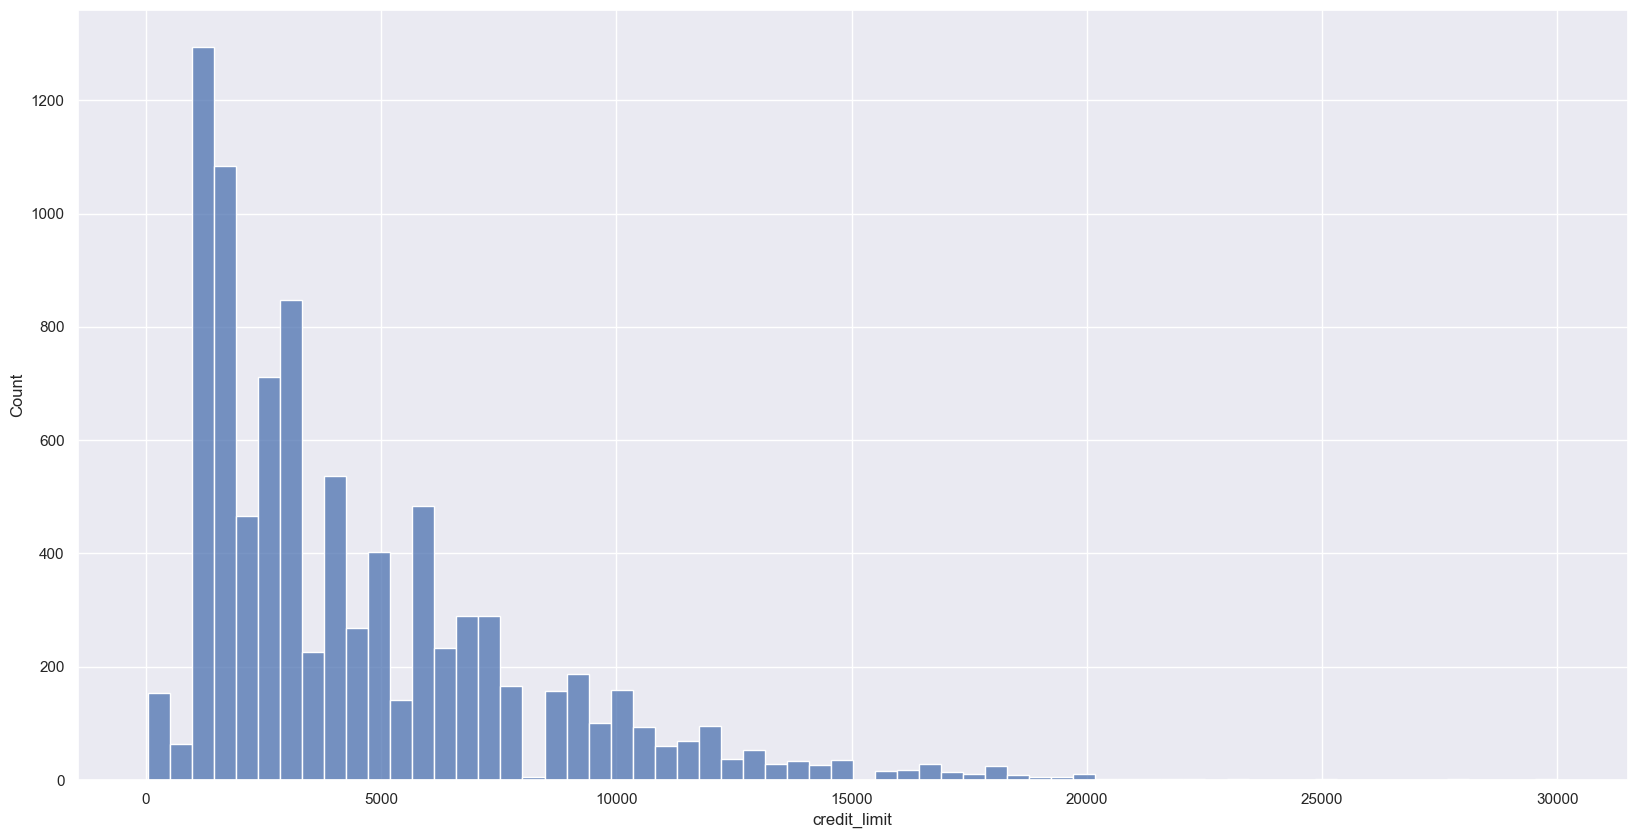

In [74]:
plt.figure( figsize=( 20, 10) )
sns.histplot( x='credit_limit', data=num_attributes )

## Box Plot
- Show the 4 attributes principal of a feature: 
    - center
    - Variability
    - Asymmetry 
    - Outliers.


Attributes:
- Outliers
- Minimum
- Quartile 1
- Quartile 2
- Quartile 3
- Maximun
- Outliers

<AxesSubplot: xlabel='credit_limit'>

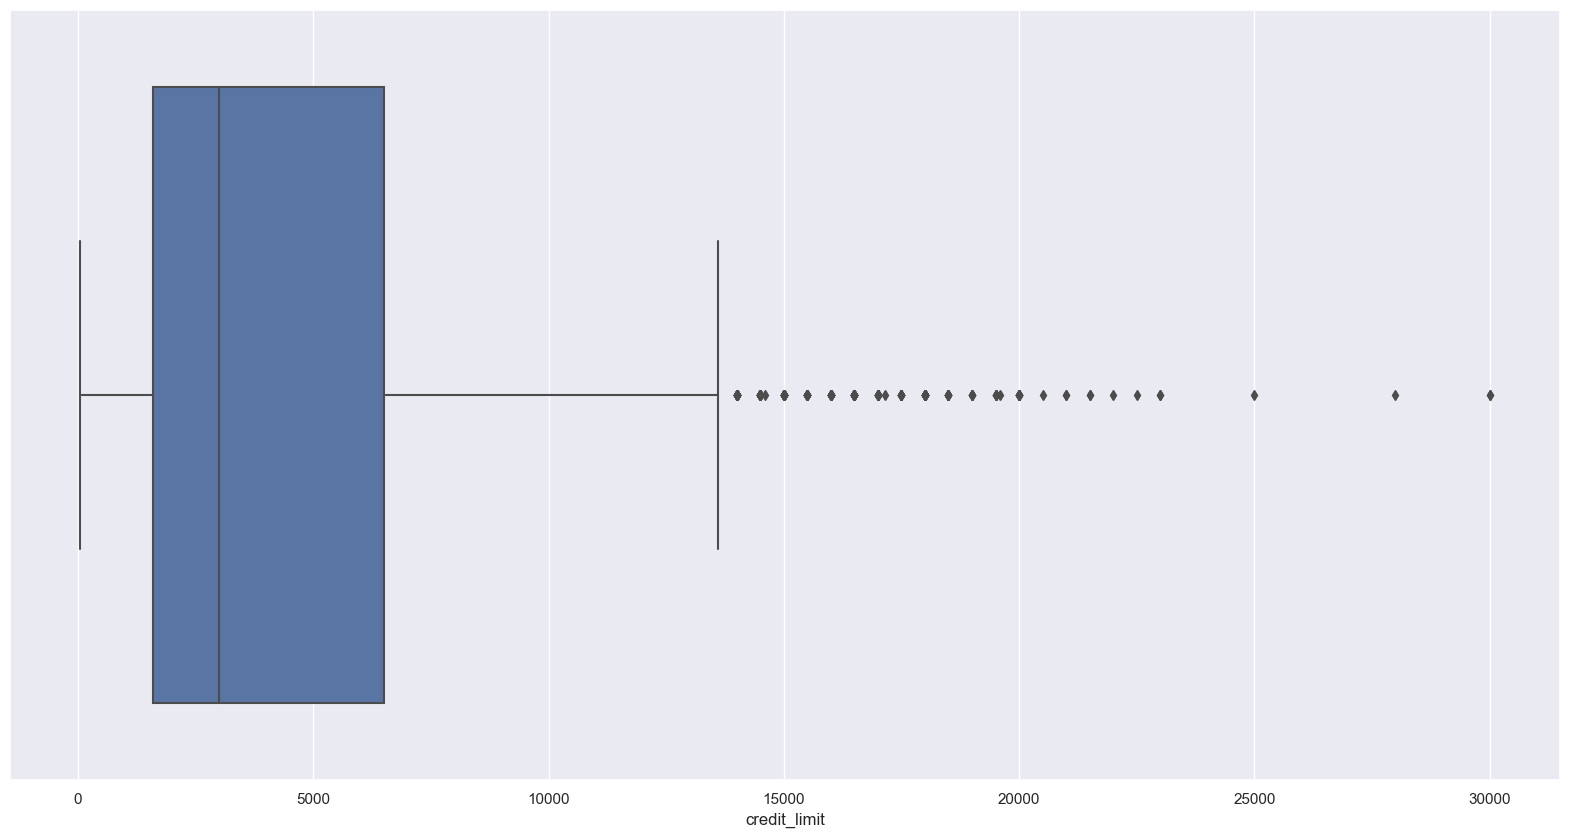

In [75]:
plt.figure( figsize=( 20, 10) )
sns.boxplot( x='credit_limit', data=num_attributes )

In [76]:
np.quantile( num_attributes['credit_limit'], q=[0.25, 0.50, 0.75] )

array([1600., 3000., 6500.])

In [77]:
q1 = 1600
q2 = 3000
q3 = 6500

In [78]:
minq =  q1 - 1.5 * ( q3 - q1)
minq

-5750.0

In [79]:
num_attributes['credit_limit'].min()

50.0

In [80]:
maxq = q3 + 1.5 * ( q3 -q1)
maxq

13850.0

In [81]:
# #calculate real minimum and maximum

# minq =  q1 - 1.5 * ( q3 - q1)
# maxq = q3 + 1.5 * ( q3 -q1)

# if minq < min_value_from_dataset:
#     print( num_attributes[ 'credit_limit' ].min() )
    
# else:
#     print( minq)
    


    
# if maxq > max_value_from_dataset:
#     print( max_value_from_datase) 
    
# else:
#     print( maxq)    


## Violin Plot
- Show the 4 attributes principal of a feature: 
    - Center
    - Variability
    - Asymmetry 
    - Outliers
    - Density.

<AxesSubplot: xlabel='credit_limit'>

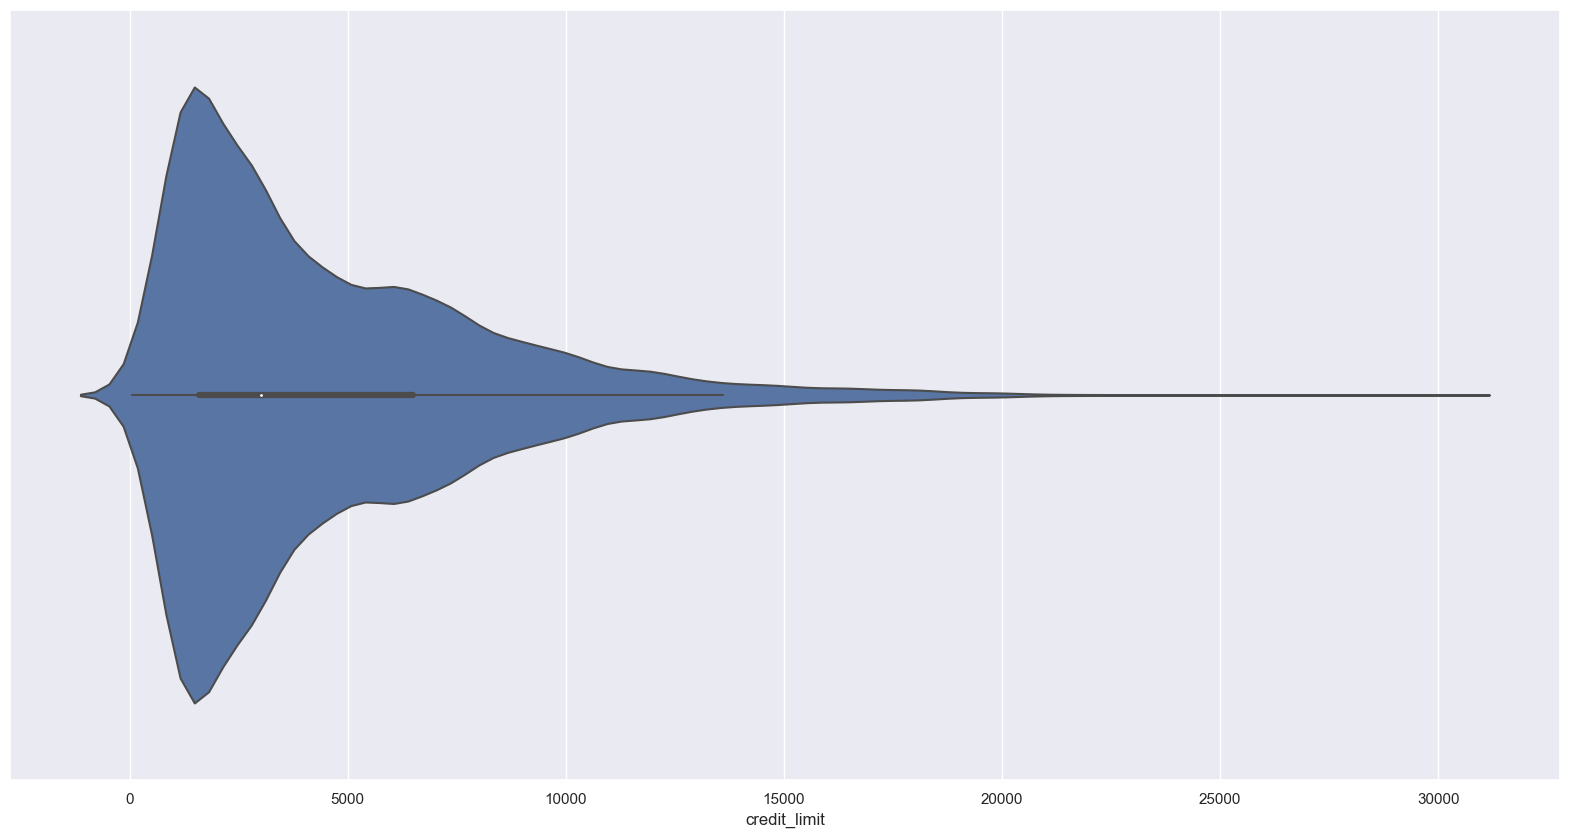

In [89]:
plt.figure( figsize=( 20, 10) )
sns.violinplot( x='credit_limit', data=num_attributes )

# 2.0 Data Filtering

In [90]:
df2 = df1.copy()

# 3.0 Feature Engeneering

In [91]:
df3 = df2.copy()

In [92]:
## Dimensao:

# Tempo ( Ano, mes , dia, hora e minuto )
# Espaco ( localizacao, regiao, lat, log, bairro, rua )
# Produto ( nome, tipo, categoria, preco, condicao de compra )
# Marketing ( organica, paid{ facebook, google})

In [93]:
## Candidate Feature to be Removed ( i don't know the feature has been calculate )
# cash_adv_freq 
# purchases_install_freq 
# tenure

In [94]:
# uni price
#df3.loc[:,'unit_price'] = df3.loc[:, 'purchases'] / df3.loc[:, 'purchases_trx']


# one off payment yes or not  ( pagamento a vista ou nao )
df3['one_payment'] = df3['one_purchases'].apply( lambda x: 0 if x == 0.00 else 1)

# Avg spent by each transaction ( gasto medio por transacao de compra )
#df3['avg_ticket_purchases'] = df3['purchases'] / df3['purchases_trx'] 

# Total Avg spent by each transaction ( gasto medio total por transacao de compra )
#df3['avg_ticket_expenses'] = ( df3['purchases'] + df3['cash_adv'] ) / ( df3['purchases_trx'] + df3['cash_adv'])
# Payment Sum ( soma das despesas /. pagamentos)
#df3['debit_rate'] = ( df3['purchases'] + df3['cash_adv'] ) / ( df3['payments'] + df3['min_pay'])


# # Percentage of card limite use ( )
# df3['credit_limit_rate'] = df3['purchases'] / 6 * df3['credit_limit']
# df3 =df3[~df3.isin([np.nan, np.inf, -np.inf]).any(1)]

df3['gross_revenue'] =  df3['balance'] + df3['cash_adv'] * 0.03
df3 = df3.dropna()


In [95]:
df3.isna().sum()

id                        0
balance                   0
balance_freq              0
purchases                 0
one_purchases             0
install_purchases         0
cash_adv                  0
purchases_freq            0
one_purchases_freq        0
purchases_install_freq    0
cash_adv_freq             0
cash_adv_trx              0
purchases_trx             0
credit_limit              0
payments                  0
min_pay                   0
prc_full_pay              0
tenure                    0
one_payment               0
gross_revenue             0
dtype: int64

In [96]:
df3.head()

id      balance  balance_freq  purchases  one_purchases  install_purchases     cash_adv  purchases_freq  one_purchases_freq  purchases_install_freq  cash_adv_freq  cash_adv_trx  purchases_trx  credit_limit     payments      min_pay  prc_full_pay  tenure  one_payment  gross_revenue
0  10001    40.900749      0.818182      95.40           0.00               95.4     0.000000        0.166667            0.000000                0.083333       0.000000             0              2        1000.0   201.802084   139.509787      0.000000      12            0      40.900749
1  10002  3202.467416      0.909091       0.00           0.00                0.0  6442.945483        0.000000            0.000000                0.000000       0.250000             4              0        7000.0  4103.032597  1072.340217      0.222222      12            0    3395.755780
2  10003  2495.148862      1.000000     773.17         773.17                0.0     0.000000        1.000000            1.000000                0.000000       0.000000             0             12        7500.0   622.066742   627.284787      0.000000      12            1    2495.148862
3  10004  1666.670542      0.636364    1499.00        1499.00                0.0   205.788017        0.083333            0.083333                0.000000       0.083333             1              1        7500.0     0.000000     0.000000      0.000000      12            1    1672.844183
4  10005   817.714335      1.000000      16.00          16.00                0.0     0.000000        0.083333            0.083333                0.000000       0.000000             0              1        1200.0   678.334763   244.791237      0.000000      12            1     817.714335

# 4.0 Exploratory Data Analysis

In [98]:
df4 = df3.copy()


## 4.1 Univariate Analysis

In [763]:
profile = ProfileReport( df4 )
profile.to_file( 'output.html' )

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot: xlabel='payments', ylabel='Density'>

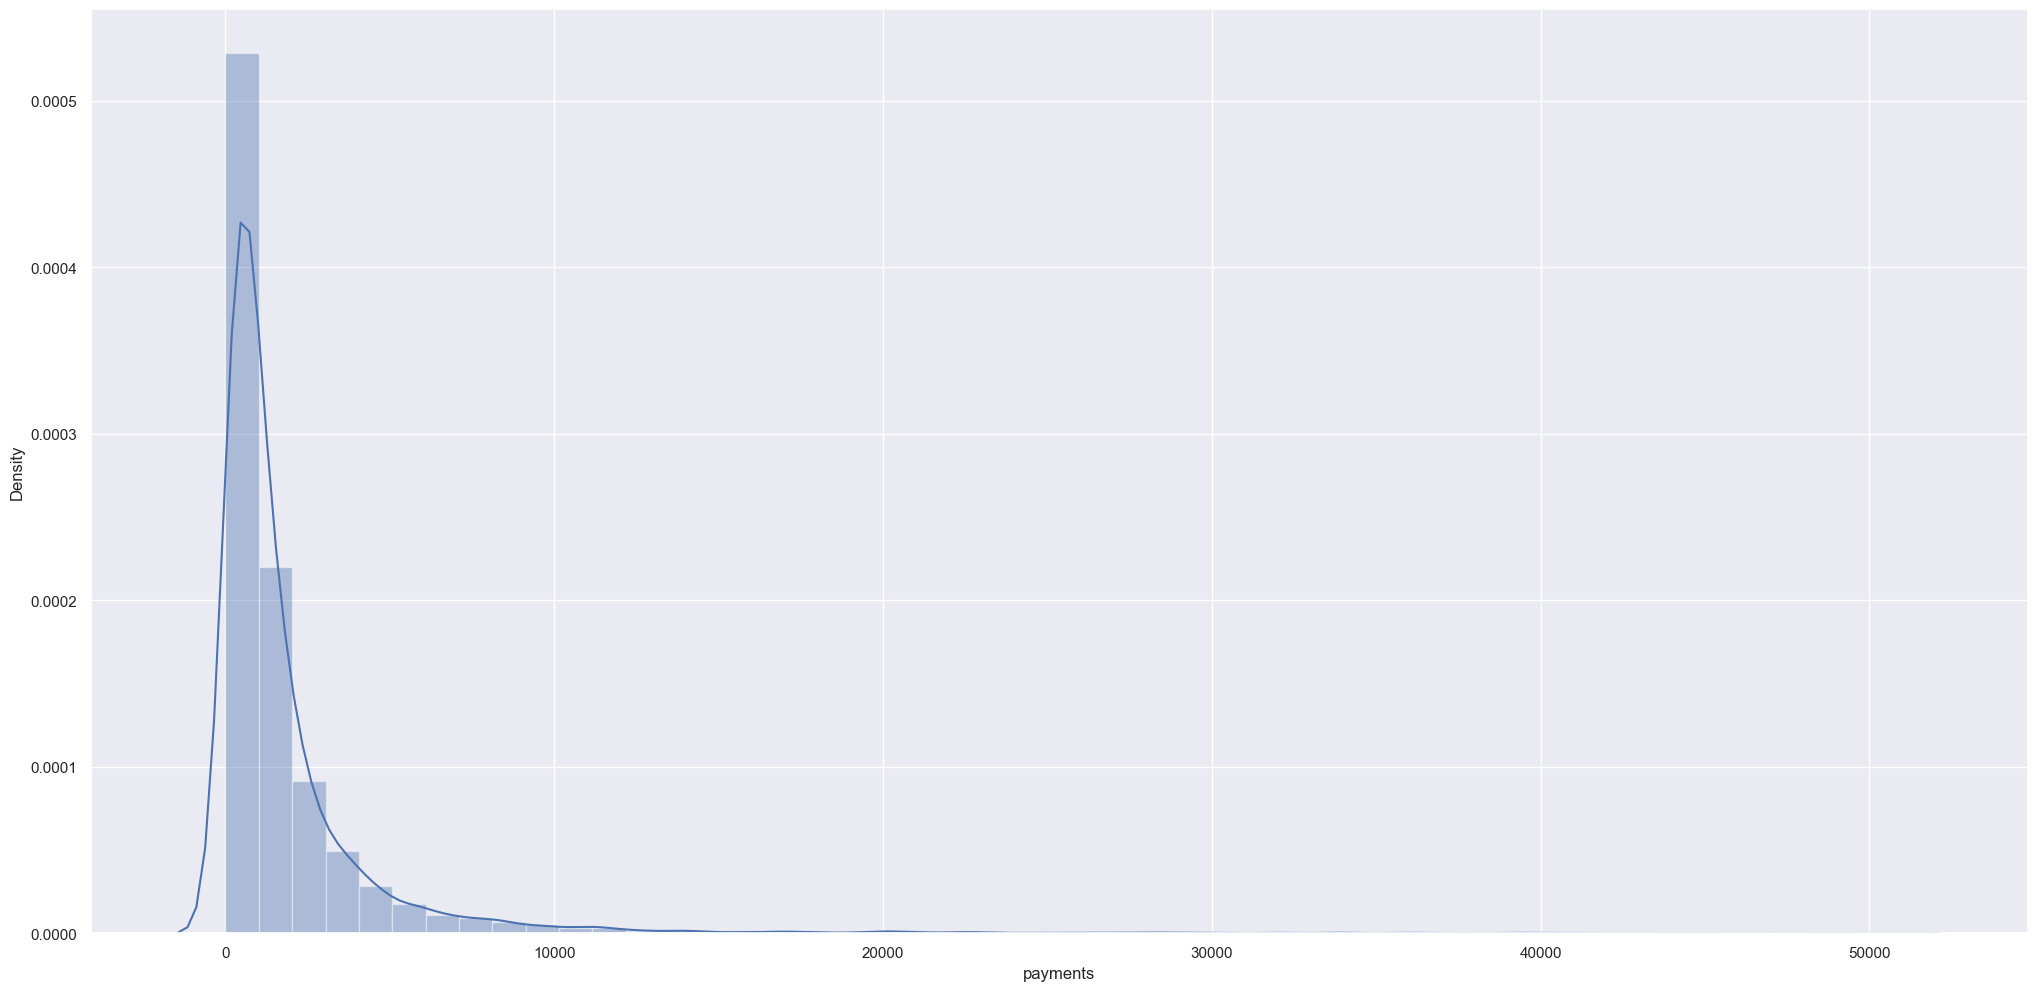

In [764]:
sns.distplot (df4['payments'])

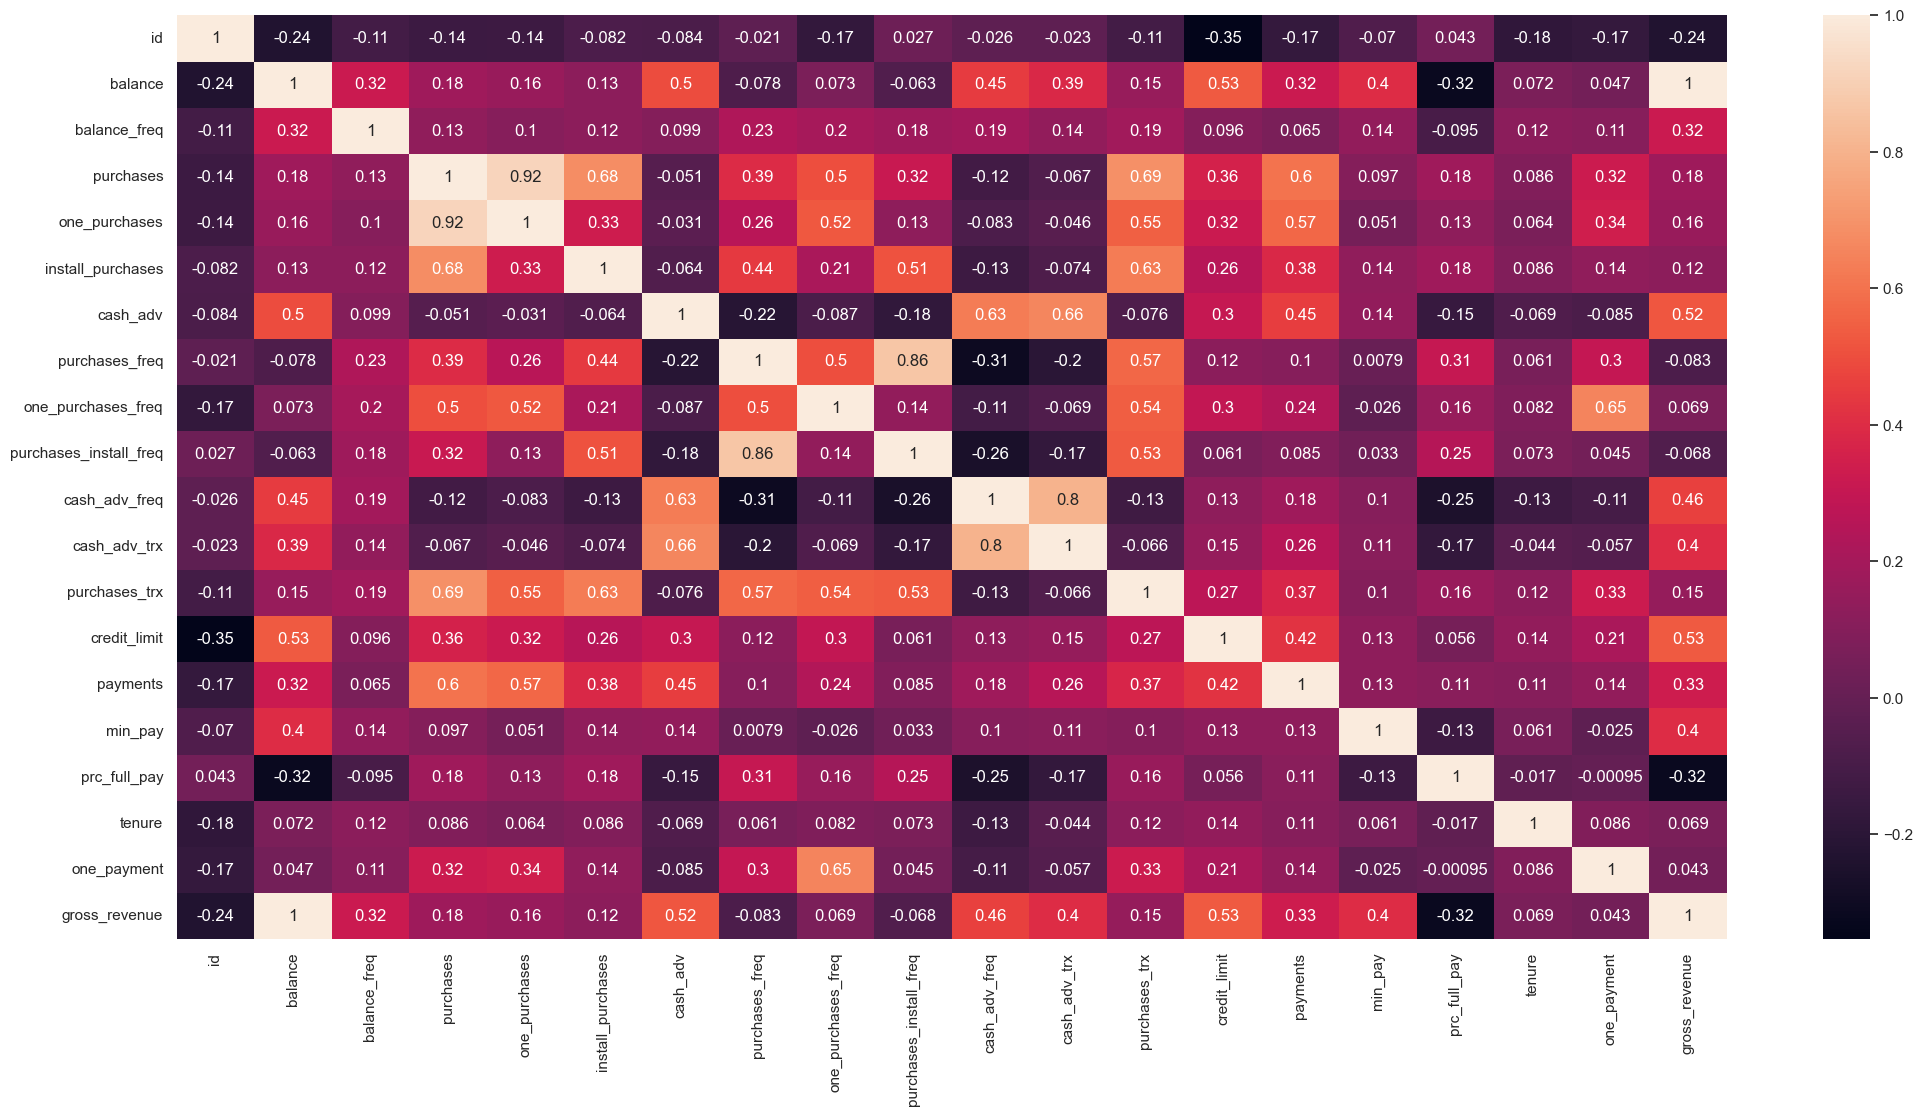

In [99]:
correlation = df4.corr (method = 'pearson')
sns.heatmap (correlation, annot = True);

## 4.2 Bivariate Analysis


In [114]:
cols = ['id']
df42 = df4.drop( cols, axis=1 )
df4 = df4.dropna()

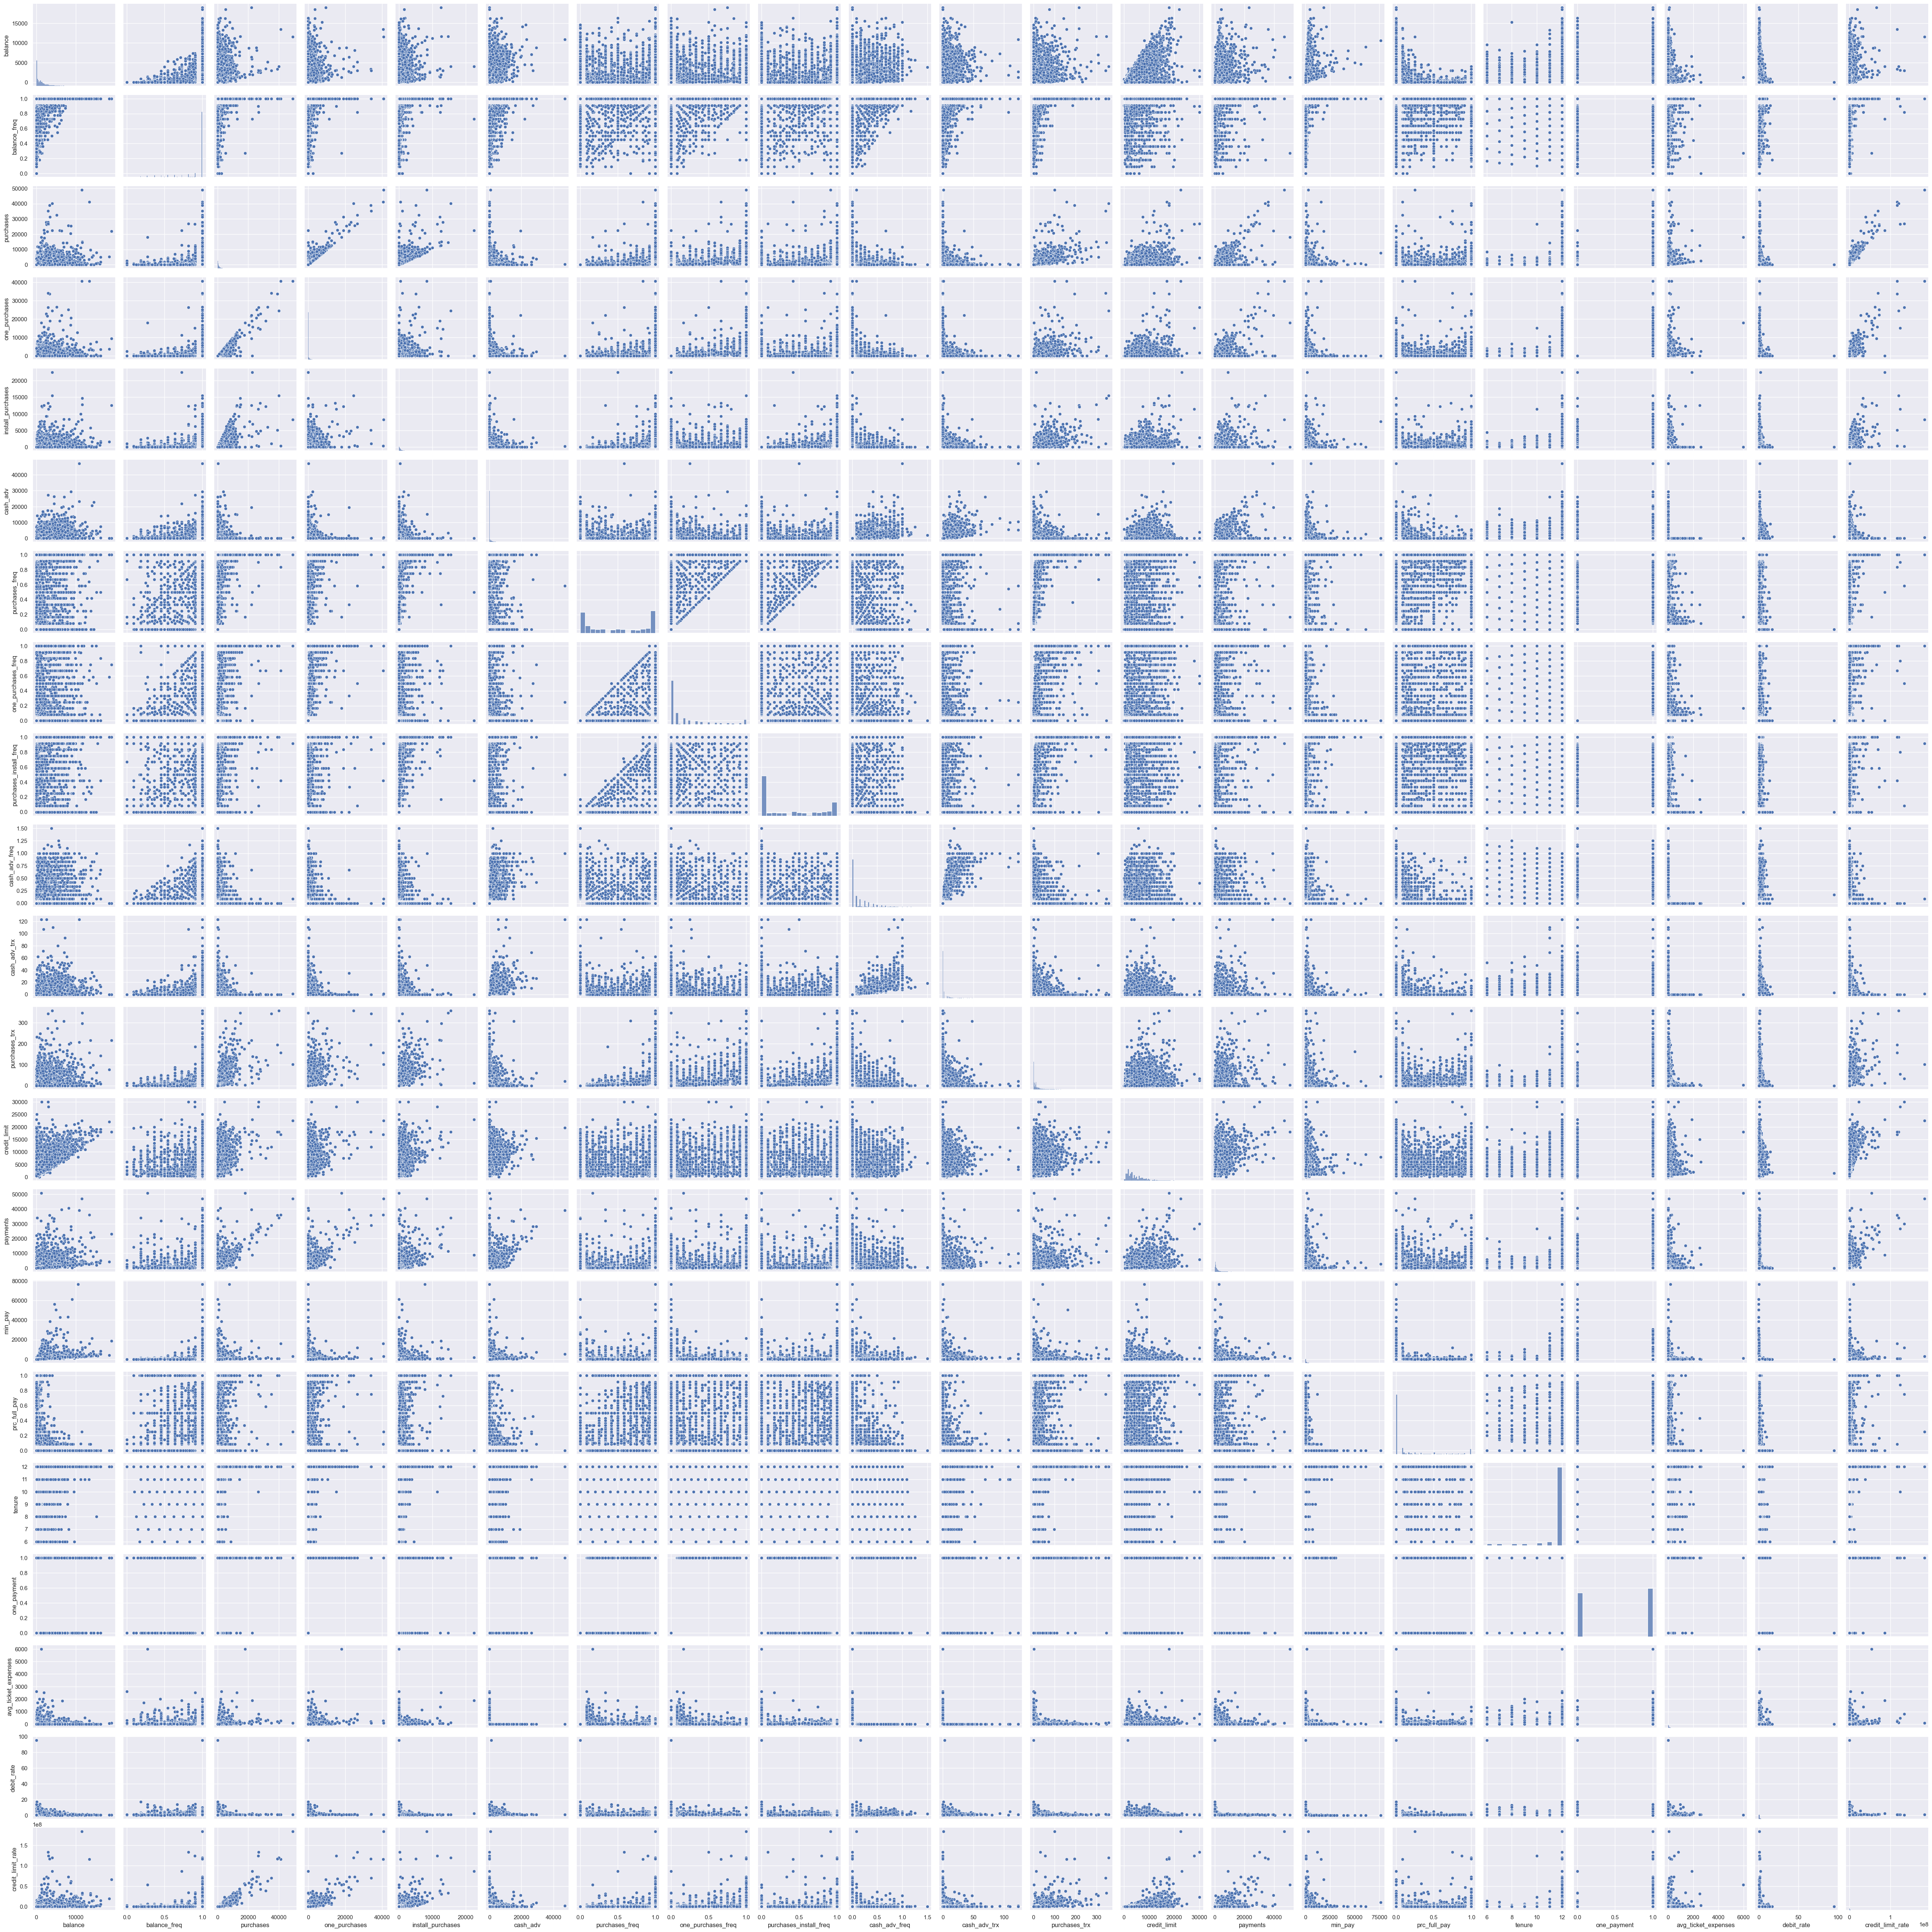

In [37]:
#plt.figure( figsize=(25, 12) )
sns.pairplot( df42)

## 4.3 Outliers Detection


<AxesSubplot: >

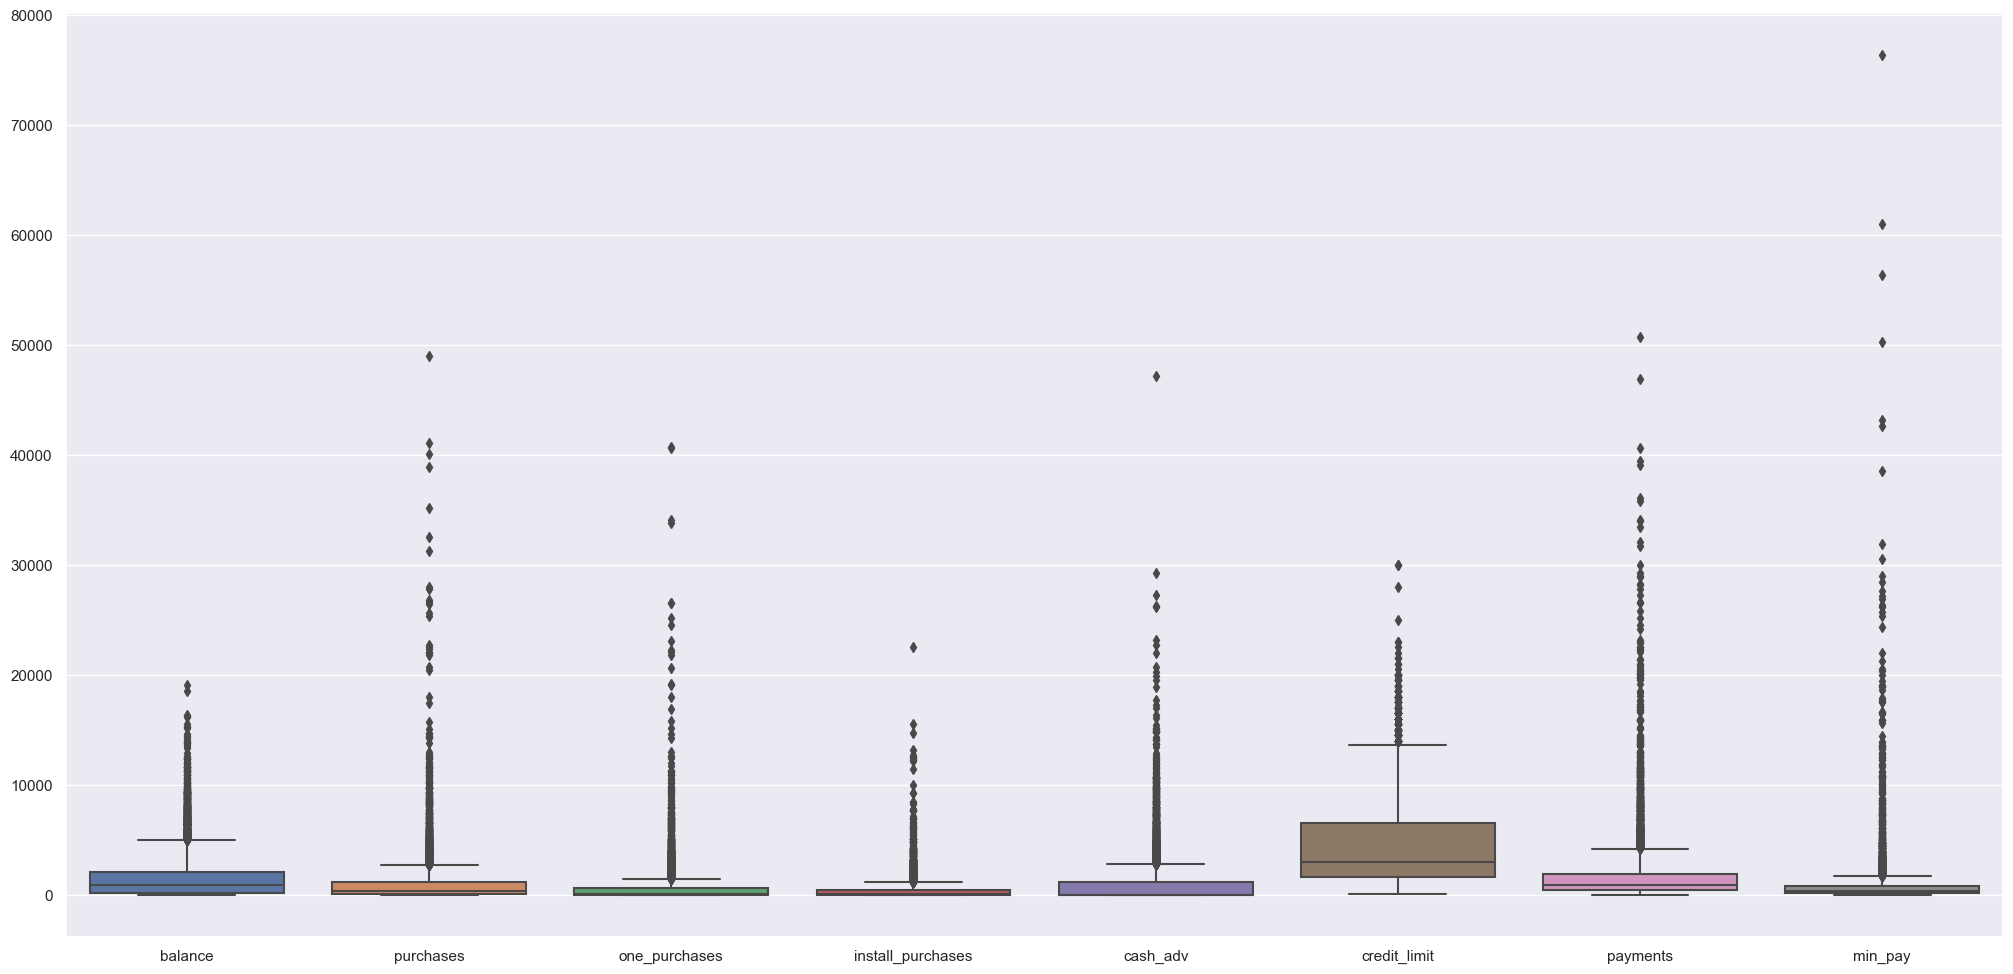

In [115]:

sns.boxplot (df4[['balance', 'purchases', 'one_purchases','install_purchases', 'cash_adv', 'credit_limit', 'payments', 'min_pay']] )

### 4.3.1 Isolation Forest

In [135]:
df41 = df4[['id', 'balance', 'purchases', 'one_purchases','install_purchases', 'cash_adv', 'credit_limit', 'payments', 'min_pay', 'one_payment', 
            'purchases_trx','cash_adv_trx', 'gross_revenue', 'purchases_freq', 'cash_adv_freq' ]]
df41_aux = df41.copy()
#df41 = df4.copy()


In [136]:
anomaly_inputs = df41.copy()
model_IF = en.IsolationForest(contamination=float(0.1),random_state=42)

model_IF.fit(anomaly_inputs)


df41['anomaly_scores'] = model_IF.decision_function( anomaly_inputs )
df41['anomaly'] = model_IF.predict( anomaly_inputs )

# Print out key statistics
print(f"Number of anomalous values {len(df41[df41['anomaly']==-1])}")
print(f"Number of non anomalous values  {len(df41[df41['anomaly']== 1])}")
print(f'Total Number of Values: {len(df41)}')



palette = ['#ff7f0e', '#1f77b4']
#sns.pairplot(df41, vars=anomaly_inputs, hue='anomaly', palette=palette)




Number of anomalous values 895
Number of non anomalous values  8054
Total Number of Values: 8949


### 4.3.2 Clean Outliers

In [137]:

#Remove outliers where 1 represent inliers and -1 represent outliers:
X_train_cleaned = df41[np.where(df41['anomaly'] == 1, True, False)]
X_train_cleaned.shape
#sns.pairplot(X_train_cleaned, vars=anomaly_inputs,palette=palette)

(8054, 17)

# 4.3.3 Outliers

In [138]:
outliers = df41[np.where(df41['anomaly'] == -1, True, False)]

#sns.pairplot(outliers, vars=anomaly_inputs, hue='anomaly', palette=palette)

In [139]:
# 'one_payment',    'purchases_trx', 'purchases_install_freq', 'one_purchases_freq', 'cash_adv_trx'
X_train_cleaned.shape

(8054, 17)

## 4.5 Study of Space


In [140]:
X_train_cleaned.head()

id      balance  purchases  one_purchases  install_purchases     cash_adv  credit_limit     payments      min_pay  one_payment  purchases_trx  cash_adv_trx  gross_revenue  purchases_freq  cash_adv_freq  anomaly_scores  anomaly
0  10001    40.900749      95.40           0.00               95.4     0.000000        1000.0   201.802084   139.509787            0              2             0      40.900749        0.166667       0.000000        0.089185        1
1  10002  3202.467416       0.00           0.00                0.0  6442.945483        7000.0  4103.032597  1072.340217            0              0             4    3395.755780        0.000000       0.250000        0.036060        1
2  10003  2495.148862     773.17         773.17                0.0     0.000000        7500.0   622.066742   627.284787            1             12             0    2495.148862        1.000000       0.000000        0.088799        1
3  10004  1666.670542    1499.00        1499.00                0.0   205.788017        7500.0     0.000000     0.000000            1              1             1    1672.844183        0.083333       0.083333        0.065633        1
4  10005   817.714335      16.00          16.00                0.0     0.000000        1200.0   678.334763   244.791237            1              1             0     817.714335        0.083333       0.000000        0.112361        1

### 4.5.1 PCA

In [141]:
cols_selected = X_train_cleaned.drop(columns=['anomaly', 'anomaly_scores'], axis=1)

df44 = cols_selected.copy()
#df44 = df4.drop( columns=['id'] ) 
#'balance', 'purchases', 'one_purchases','install_purchases', 'cash_adv', 'credit_limit', 'payments', 'min_pay'

In [142]:

mm = pp.MinMaxScaler()

#df44['tenure'] = mm.fit_transform( df44[['tenure']] )
df44['gross_revenue'] = mm.fit_transform( df44[['gross_revenue']] )
df44['balance'] = mm.fit_transform( df44[['balance']] )
df44['min_pay'] = mm.fit_transform( df44[['min_pay']] )
df44['payments'] = mm.fit_transform( df44[['payments']] )
df44['cash_adv'] = mm.fit_transform( df44[['cash_adv']] )
df44['purchases'] = mm.fit_transform( df44[['purchases']] )
#df44['debit_rate'] = mm.fit_transform( df44[['debit_rate']] )
#df44['one_payment'] = mm.fit_transform( df44[['one_payment']] )
df44['cash_adv_trx'] = mm.fit_transform( df44[['cash_adv_trx']] )
#df44['balance_freq'] = mm.fit_transform( df44[['balance_freq']] )
df44['credit_limit'] = mm.fit_transform( df44[['credit_limit']] )
#df44['prc_full_pay'] = mm.fit_transform( df44[['prc_full_pay']] )
df44['cash_adv_freq'] = mm.fit_transform( df44[['cash_adv_freq']] )
df44['one_purchases'] = mm.fit_transform( df44[['one_purchases']] )
df44['purchases_trx'] = mm.fit_transform( df44[['purchases_trx']] )
df44['purchases_freq'] = mm.fit_transform( df44[['purchases_freq']] )
#df44['credit_limit_rate'] = mm.fit_transform( df44[['credit_limit_rate']] )
df44['install_purchases'] = mm.fit_transform( df44[['install_purchases']] )
#df44['one_purchases_freq'] = mm.fit_transform( df44[['one_purchases_freq']] )
# df44['avg_ticket_expenses'] = mm.fit_transform( df44[['avg_ticket_expenses']] )
#df44['purchases_install_freq'] = mm.fit_transform( df44[['purchases_install_freq']] )


x = df44.copy()

In [143]:
mm = pp.MinMaxScaler()

df41_aux['gross_revenue'] = mm.fit_transform( df41_aux[['gross_revenue']] )
df41_aux['balance'] = mm.fit_transform( df41_aux[['balance']] )
df41_aux['min_pay'] = mm.fit_transform( df41_aux[['min_pay']] )
df41_aux['payments'] = mm.fit_transform( df41_aux[['payments']] )
df41_aux['cash_adv'] = mm.fit_transform( df41_aux[['cash_adv']] )
df41_aux['purchases'] = mm.fit_transform( df41_aux[['purchases']] )
#df41_aux['one_payment'] = mm.fit_transform( df41_aux[['one_payment']] )
df41_aux['cash_adv_trx'] = mm.fit_transform( df41_aux[['cash_adv_trx']] )
df41_aux['credit_limit'] = mm.fit_transform( df41_aux[['credit_limit']] )
df41_aux['cash_adv_freq'] = mm.fit_transform( df41_aux[['cash_adv_freq']] )
df41_aux['one_purchases'] = mm.fit_transform( df41_aux[['one_purchases']] )
df41_aux['purchases_trx'] = mm.fit_transform( df41_aux[['purchases_trx']] )
df41_aux['purchases_freq'] = mm.fit_transform( df41_aux[['purchases_freq']] )
df41_aux['install_purchases'] = mm.fit_transform( df41_aux[['install_purchases']] )

x_aux = df41_aux.copy()

In [144]:
x.shape

(8054, 15)

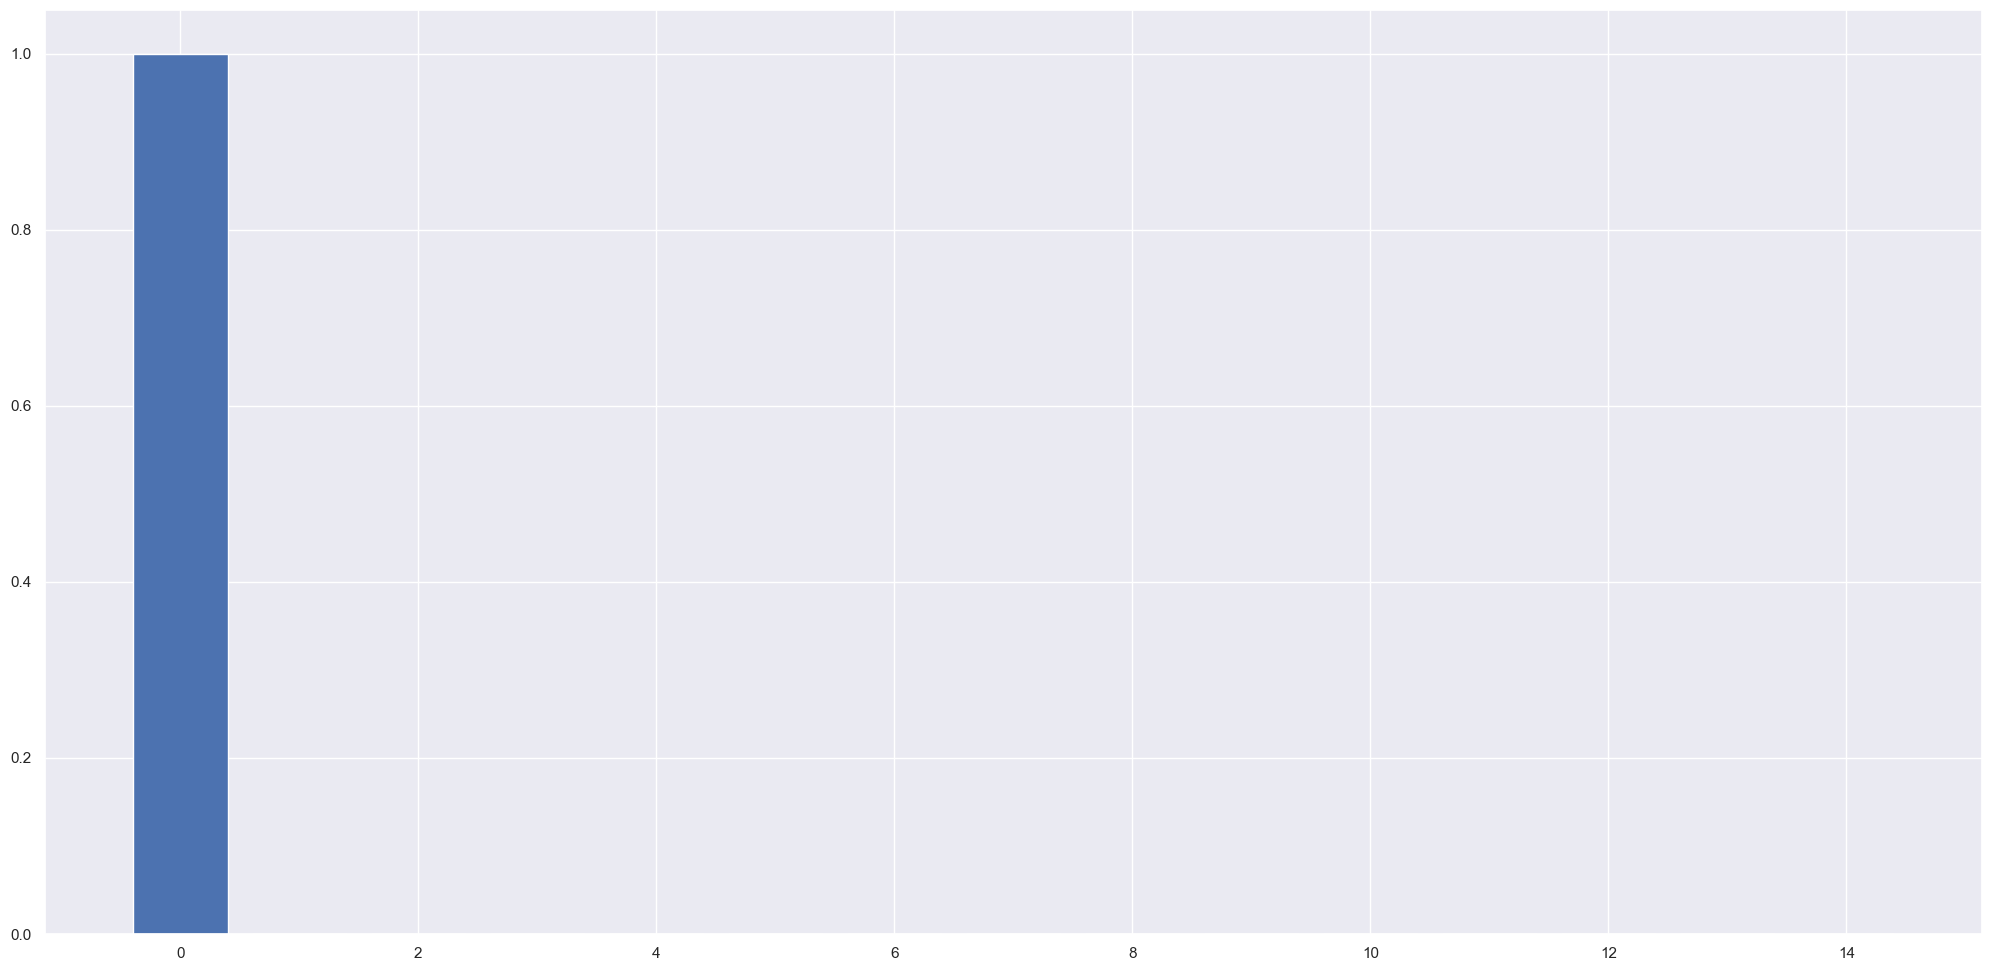

In [145]:
pca = dd.PCA( n_components =  x.shape[1] )

principal_components = pca.fit_transform( x )

# Plot Explaneid Variable
features = range( pca.n_components_ )

plt.bar( features, pca.explained_variance_ratio_)

# PCA Conponent
df_pca = pd.DataFrame( principal_components )

<AxesSubplot: xlabel='0', ylabel='1'>

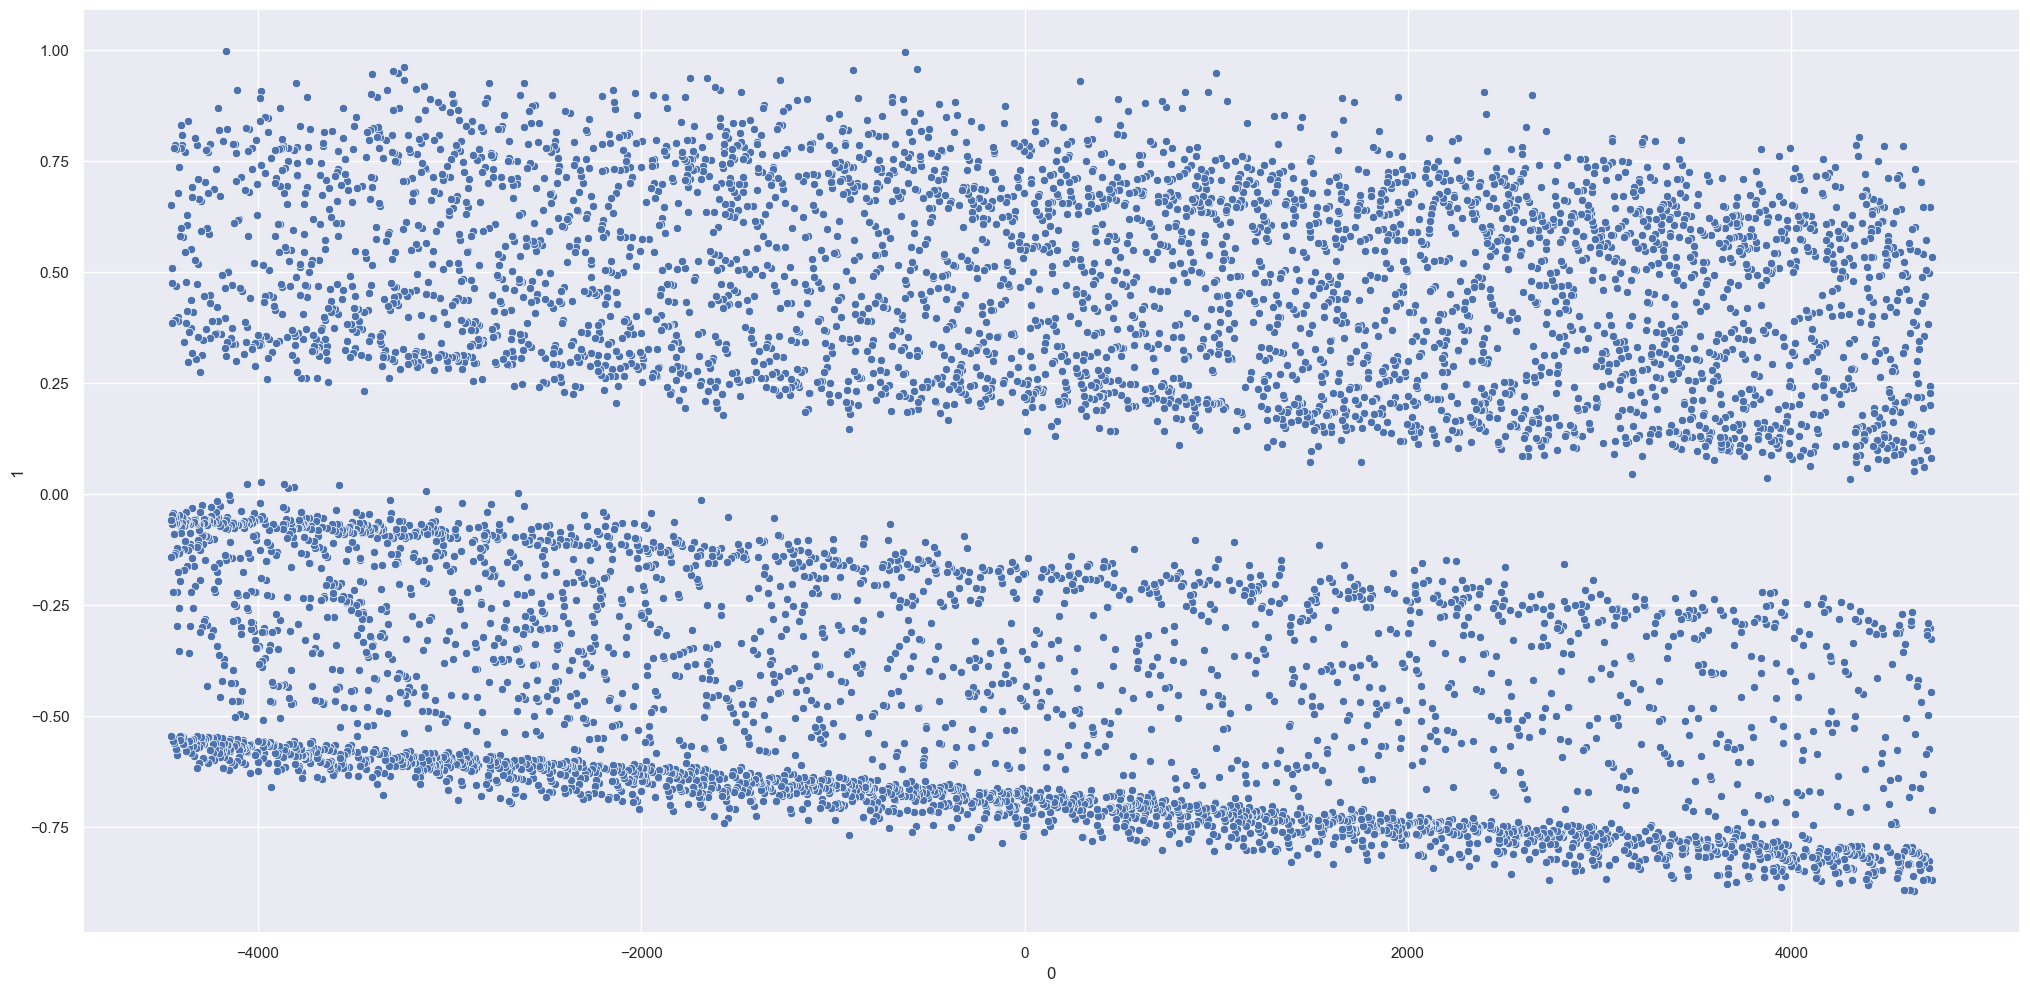

In [146]:
sns.scatterplot( x=0, y=1, data=df_pca )

### 4.5.2 Umap

In [147]:
import umap
from sklearn.datasets import load_digits


<AxesSubplot: xlabel='embedding_x', ylabel='embedding_y'>

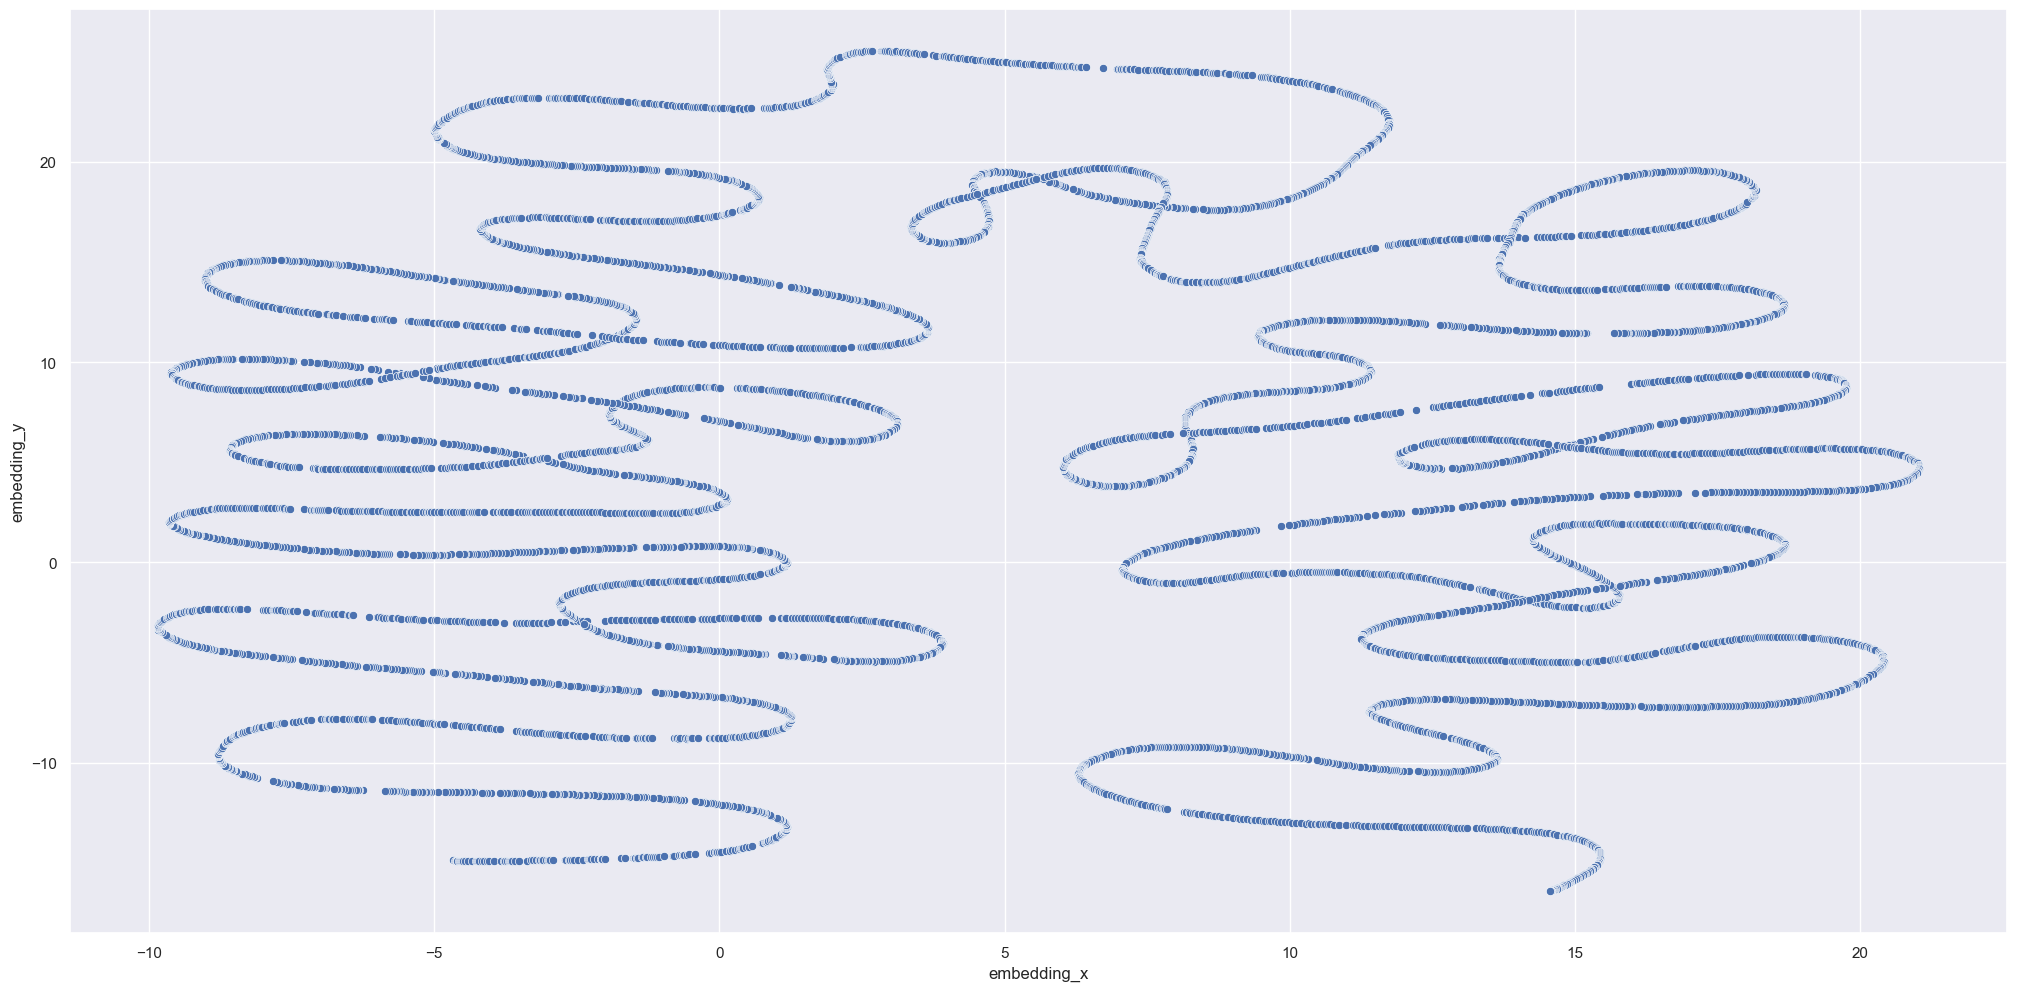

In [148]:
reducer = umap.UMAP( random_state=42 )
embedding = reducer.fit_transform( x )

# Embedding
df_pca['embedding_x'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]


# Plot UMAP
sns.scatterplot( x='embedding_x',
                 y='embedding_y',
                 data = df_pca )

### 4.5.3 T-SNE

<AxesSubplot: xlabel='embedding_x', ylabel='embedding_y'>

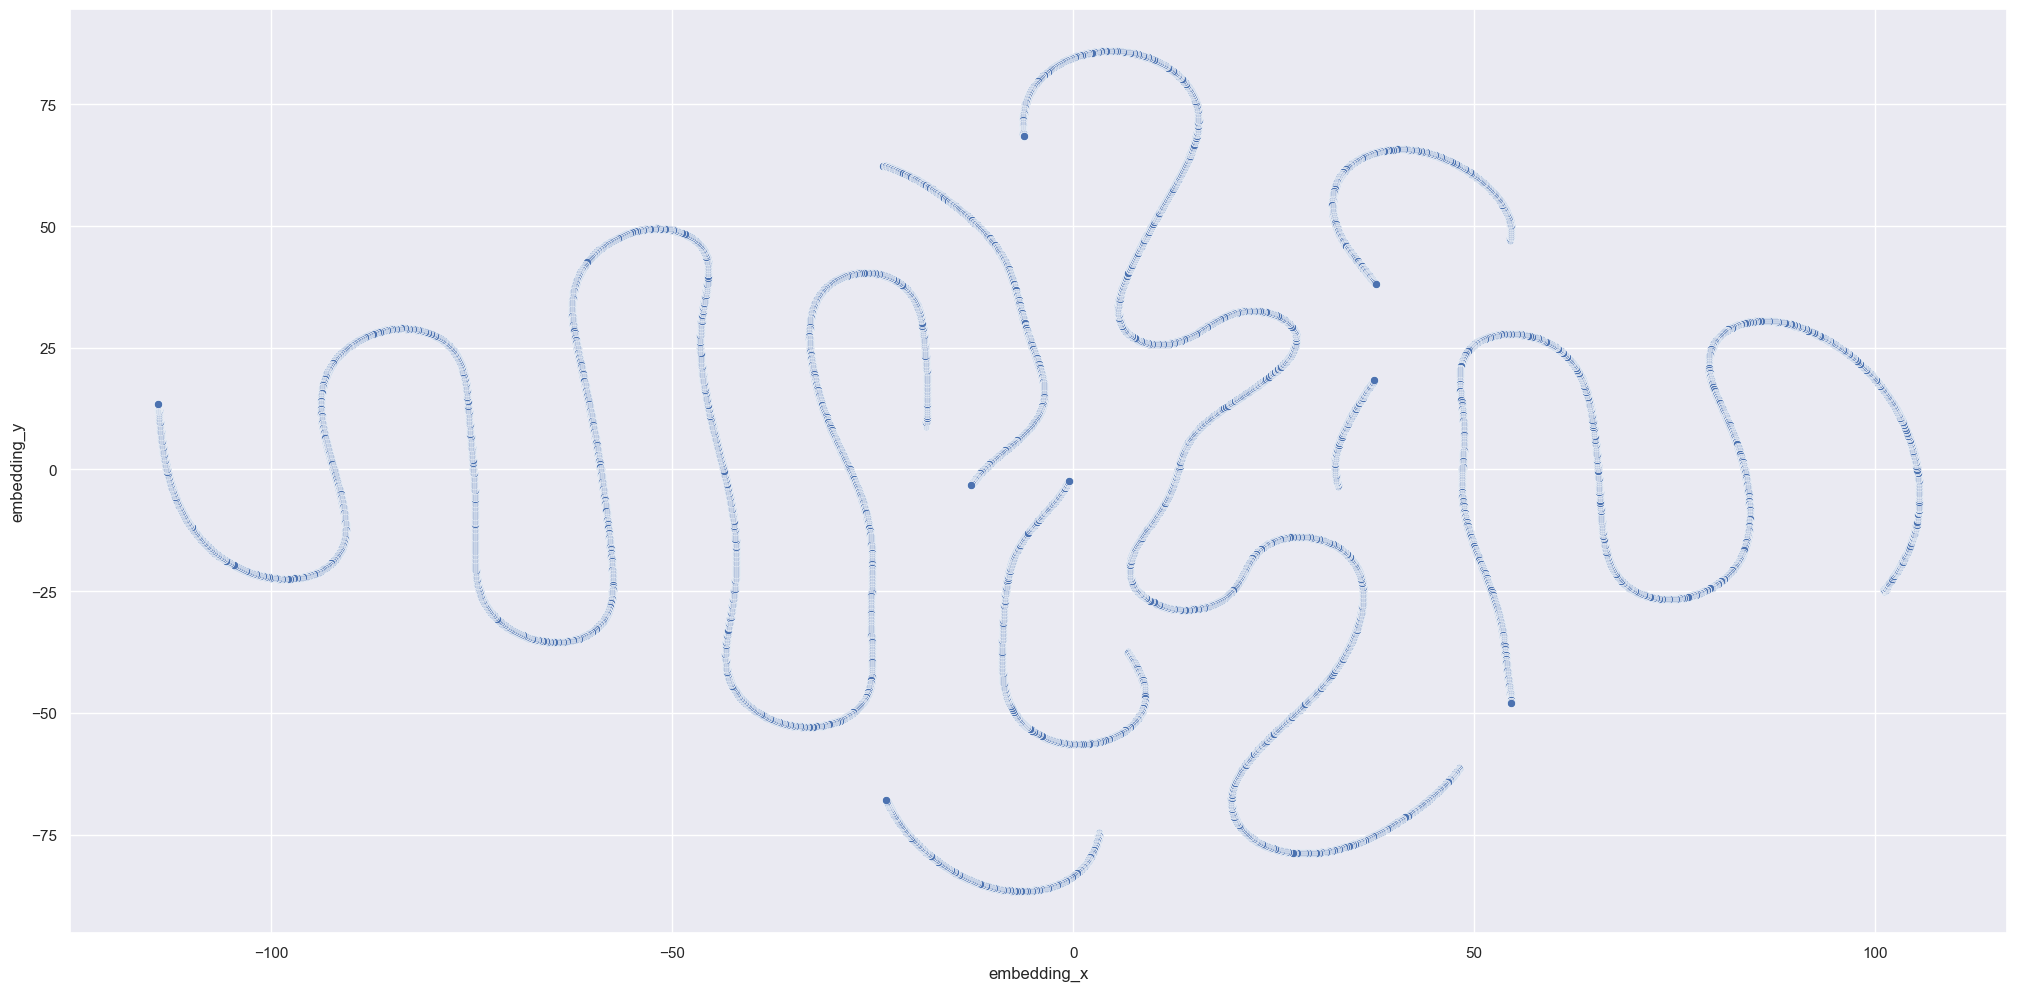

In [149]:
reducer = mn.TSNE( n_components=2, random_state=42, n_jobs =1)

embedding = reducer.fit_transform( x )

# Embedding
df_pca['embedding_x'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]


# Plot UMAP
sns.scatterplot( x='embedding_x',
                 y='embedding_y',
                 data = df_pca )

### 4.5.4 Tree Based Imbedding

In [150]:
x = df44.drop( columns=[ 'gross_revenue' ], axis=1)
y = df44['gross_revenue']

# model definition
rf_model = en.RandomForestRegressor( n_estimators=100, random_state=42 )

# Model training
rf_model.fit( x, y )


# dataframe Leaf
df_leaf= pd.DataFrame( rf_model.apply( x ) )

<AxesSubplot: xlabel='embedding_x', ylabel='embedding_y'>

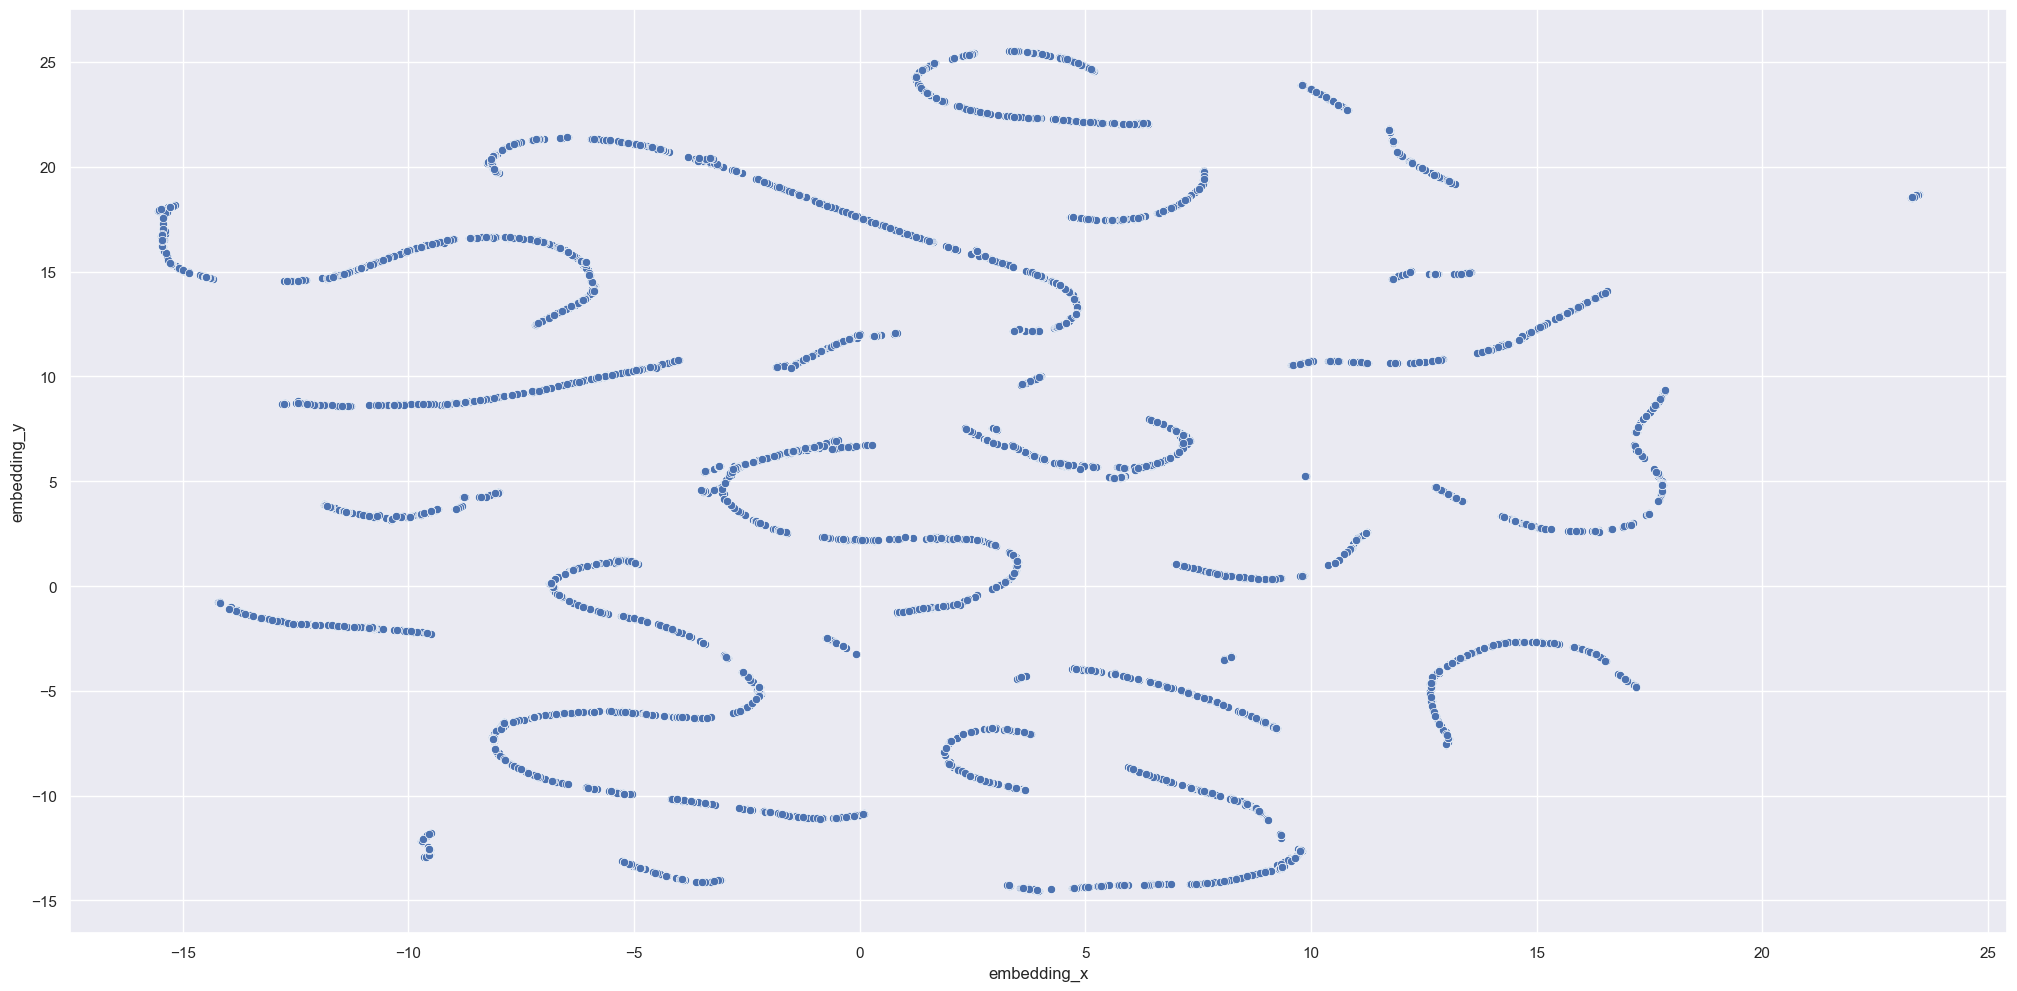

In [151]:
reducer = umap.UMAP( random_state=42 )
embedding = reducer.fit_transform( df_leaf )


# Embedding
df_tree = pd.DataFrame()
df_tree['embedding_x'] = embedding[:, 0]
df_tree['embedding_y'] = embedding[:, 1]


# Plot UMAP
sns.scatterplot( x='embedding_x',
                 y='embedding_y',
                 data = df_tree )

### 4.5.5 Tree Based Imbedding with Outliers

In [152]:
x_D = df41_aux.drop( columns=[ 'gross_revenue' ], axis=1)
y_D= df41_aux['gross_revenue']

# model definition
rf_model = en.RandomForestRegressor( n_estimators=100, random_state=42 )

# Model training
rf_model.fit( x_D, y_D )


# dataframe Leaf
df_leaf= pd.DataFrame( rf_model.apply( x_D ) )

<AxesSubplot: xlabel='embedding_x', ylabel='embedding_y'>

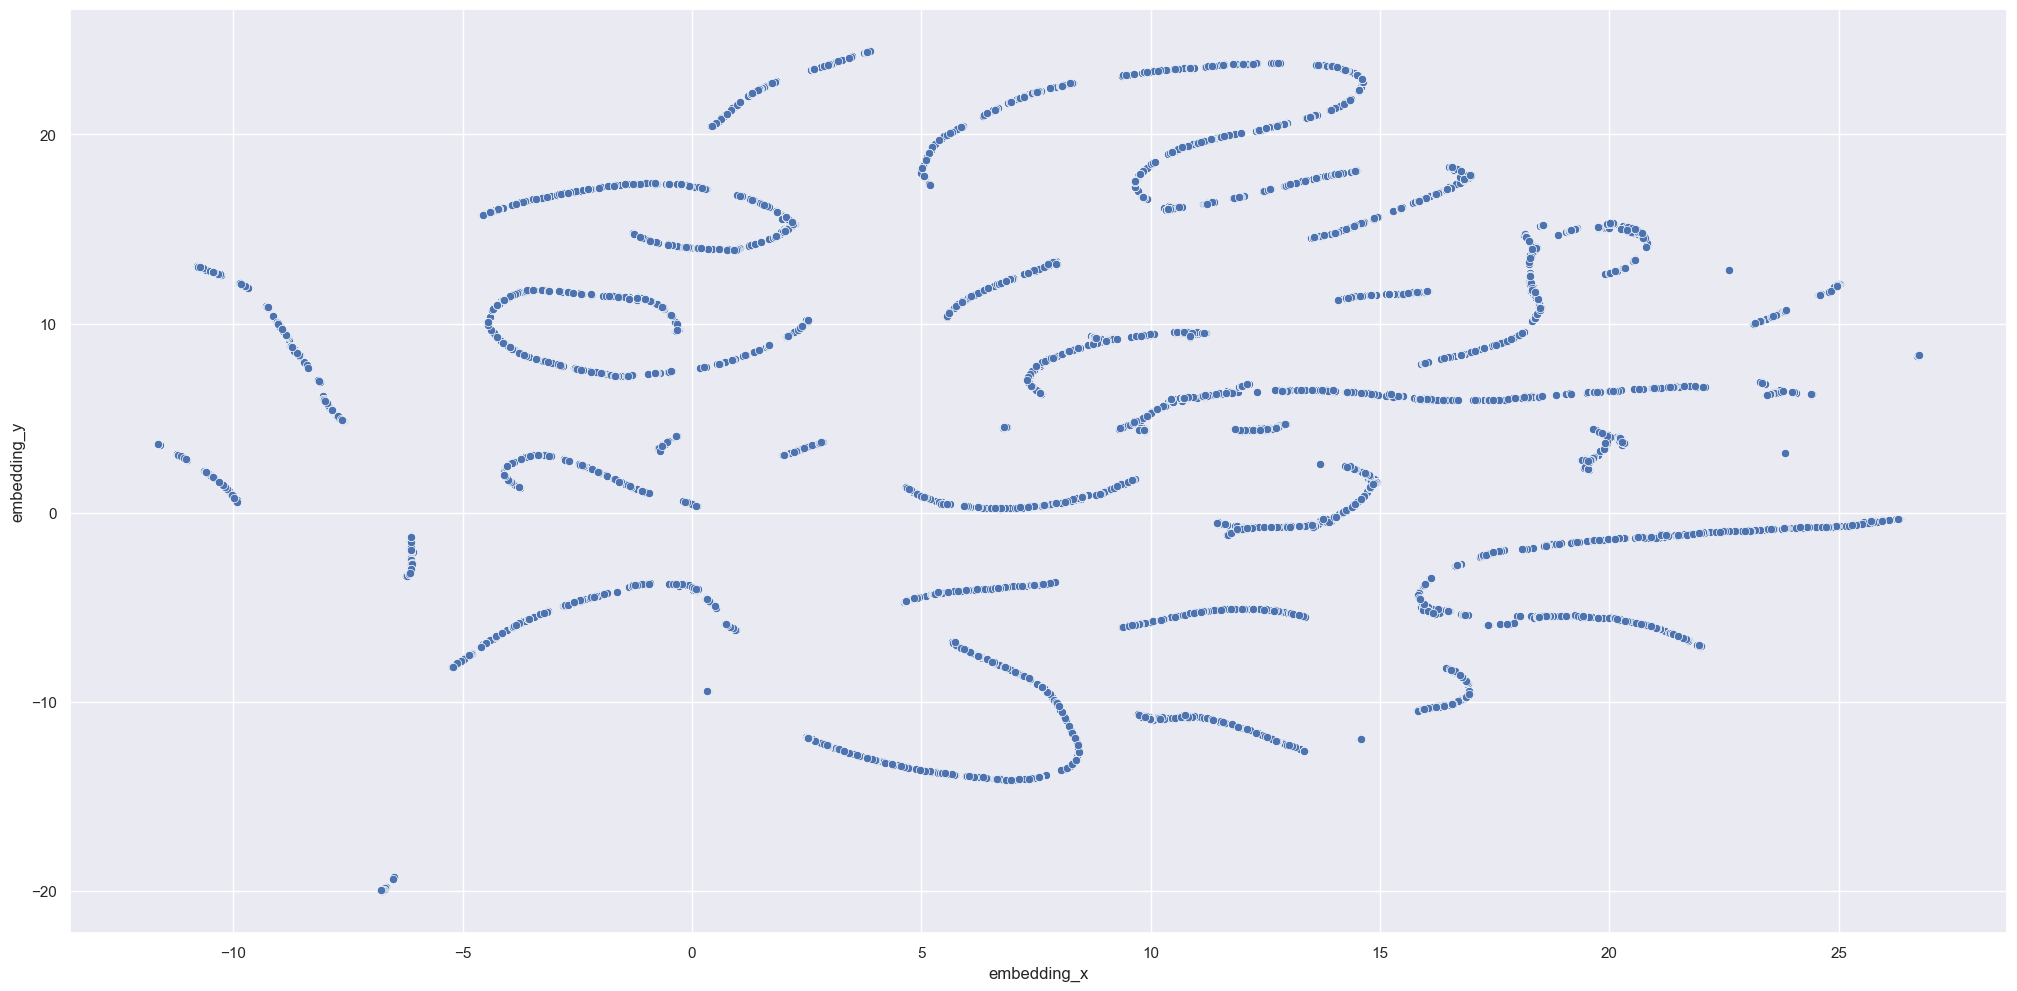

In [153]:
reducer = umap.UMAP( random_state=42 )
embedding = reducer.fit_transform( df_leaf )


# Embedding
df_tree_aux = pd.DataFrame()
df_tree_aux['embedding_x'] = embedding[:, 0]
df_tree_aux['embedding_y'] = embedding[:, 1]


# Plot UMAP
sns.scatterplot( x='embedding_x',
                 y='embedding_y',
                 data = df_tree_aux )

# 5.0 Data Preparation
    - Normal Variable + no outliers = Standard Scaler ( x - mean / std )
    - Normal Variable + outliers    = Robust Scaler ( x - Q1 / ( Q3 - Q1) )
    _ Non Normal Variable           = Min Max Sacler ( x - min / ( max - min ) )

In [154]:
#df5 = df4.copy()
df5 = df_tree.copy()
#df5 = df_tree_aux.copy()

# 6.0 Feature Selection
    

In [155]:
# #cols_selected = ['id', 'balance', 'balance_freq', 'purchases', 'one_purchases', 'install_purchases', 'cash_adv', 'purchases_freq', 
#                  'purchases_install_freq', 'cash_adv_freq', 'cash_adv_trx', 'purchases_trx', 'credit_limit', 
#                  'payments', 'min_pay', 'prc_full_pay','one_payment', 'avg_ticket_expenses', 'debit_rate', 'credit_limit_rate']


In [156]:
df6 = df5.copy()
df6.head()

embedding_x  embedding_y
0     5.955133   -14.255415
1     7.092253    18.272326
2    -0.663038    18.106100
3    -9.038713    16.528912
4    -3.377858     5.476316

# 7.0 Fine Tunning Hyperparameter

In [157]:
df7 = df6.copy()

x = df_tree.copy()

x_aux = df_tree_aux.copy()

x.head()

embedding_x  embedding_y
0     5.955133   -14.255415
1     7.092253    18.272326
2    -0.663038    18.106100
3    -9.038713    16.528912
4    -3.377858     5.476316

## 7.1 KMeans Clean

In [158]:
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

silhouette_list = []
davies_list = []

for k in clusters:
    # modeldefinition
    kmeans_model = c.KMeans( n_init=10, n_clusters=k )
    
    # model training
    kmeans_model.fit( x )
    
    # Model predict 
    labels =  kmeans_model.predict( x )
    
    # model performance
    sil = m.silhouette_score( x, labels )
    dav = m.davies_bouldin_score( x, labels )
    
    
    silhouette_list.append( sil)
    davies_list.append( dav )


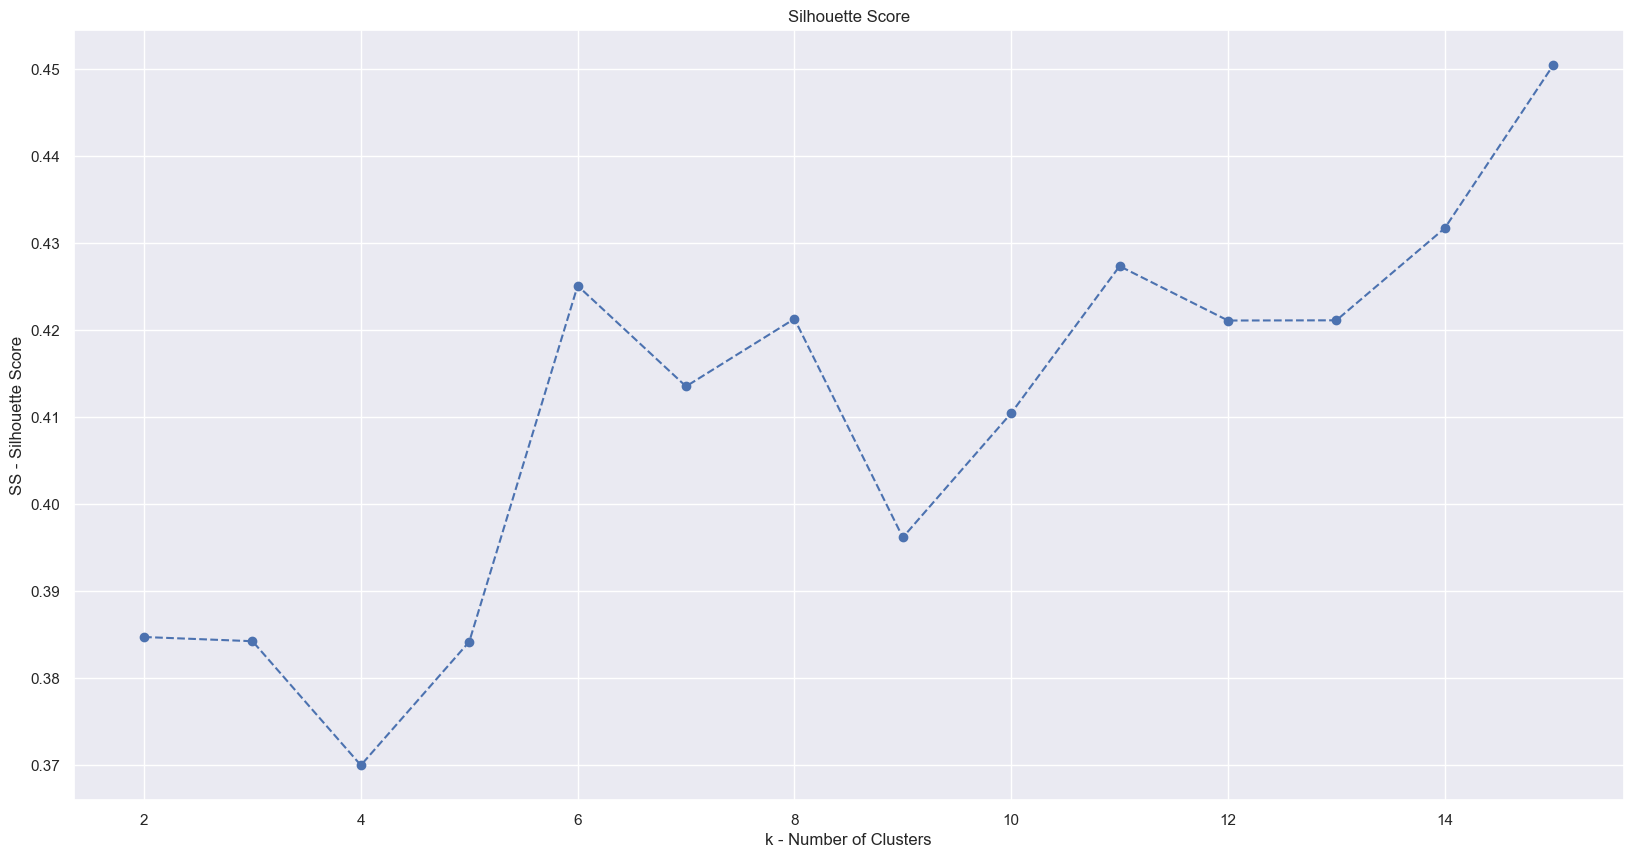

In [159]:
plt.figure( figsize=( 20, 10))
plt.plot( clusters, silhouette_list, linestyle='--', marker='o', color='b')
plt.xlabel( 'k - Number of Clusters' )
plt.ylabel( 'SS - Silhouette Score' )
plt.title('Silhouette Score');

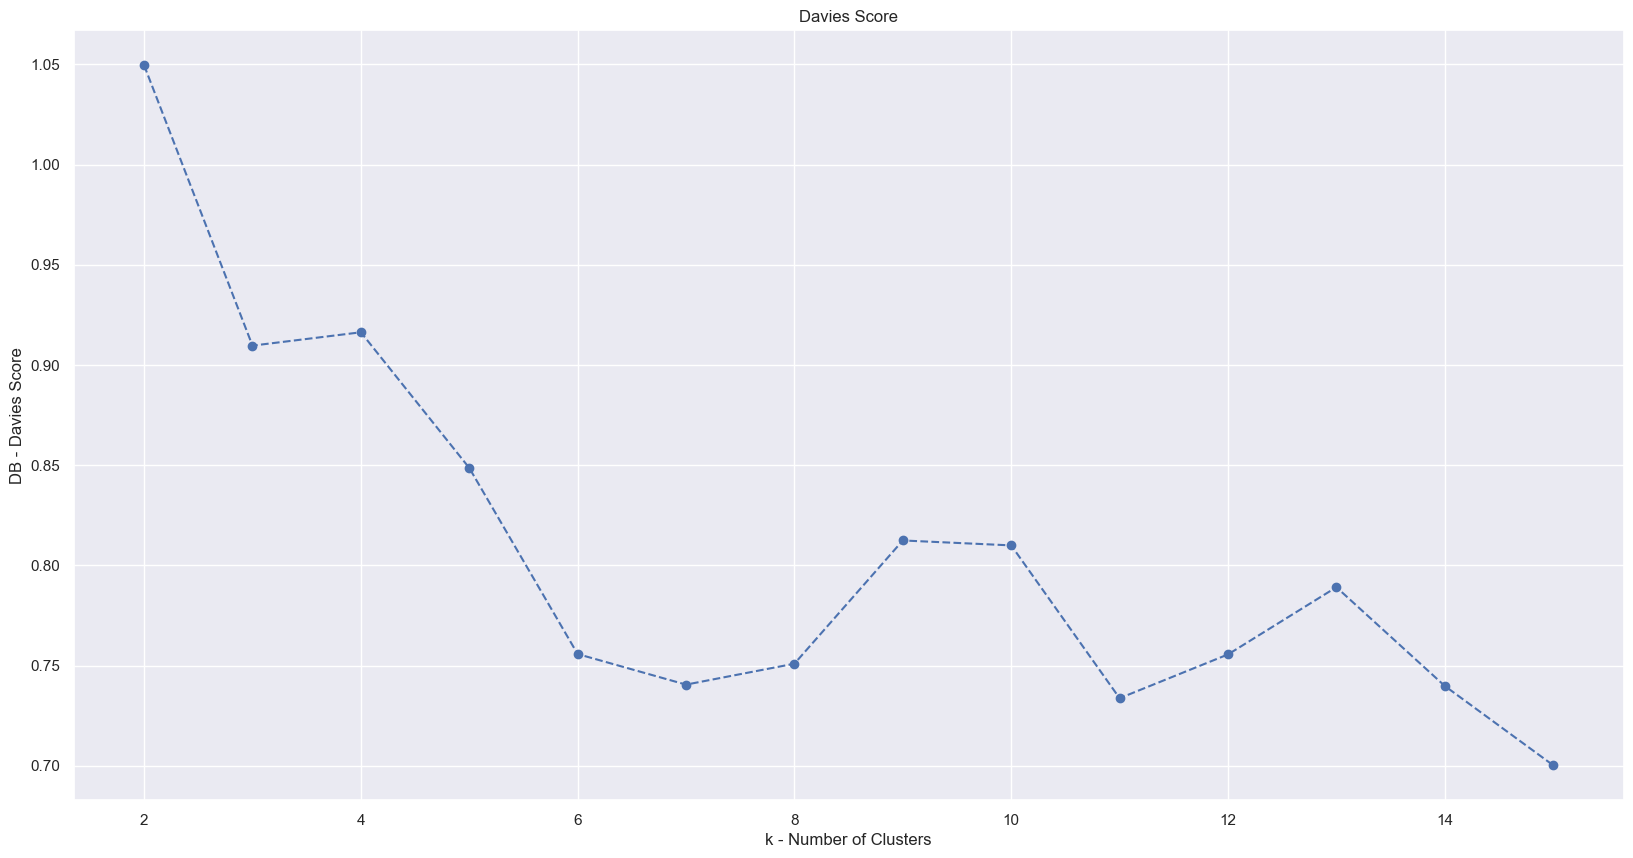

In [160]:
plt.figure( figsize=( 20, 10))
plt.plot( clusters, davies_list, linestyle='--', marker='o', color='b')
plt.xlabel( 'k - Number of Clusters' )
plt.ylabel( 'DB - Davies Score' )
plt.title('Davies Score');

### 7.1.2 KMeans Dirt

In [161]:
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

silhouette_list_D = []
davies_list_D = []

for k in clusters:
    # modeldefinition
    kmeans_model_D = c.KMeans( n_init=10, n_clusters=k )
    
    # model training
    kmeans_model_D.fit( x_aux )
    
    # Model predict 
    labels =  kmeans_model_D.predict( x_aux )
    
    # model performance
    sil = m.silhouette_score( x_aux, labels )
    dav = m.davies_bouldin_score( x_aux, labels )
    
    
    silhouette_list_D.append( sil)
    davies_list_D.append( dav )

## 7.2 GMM Clean

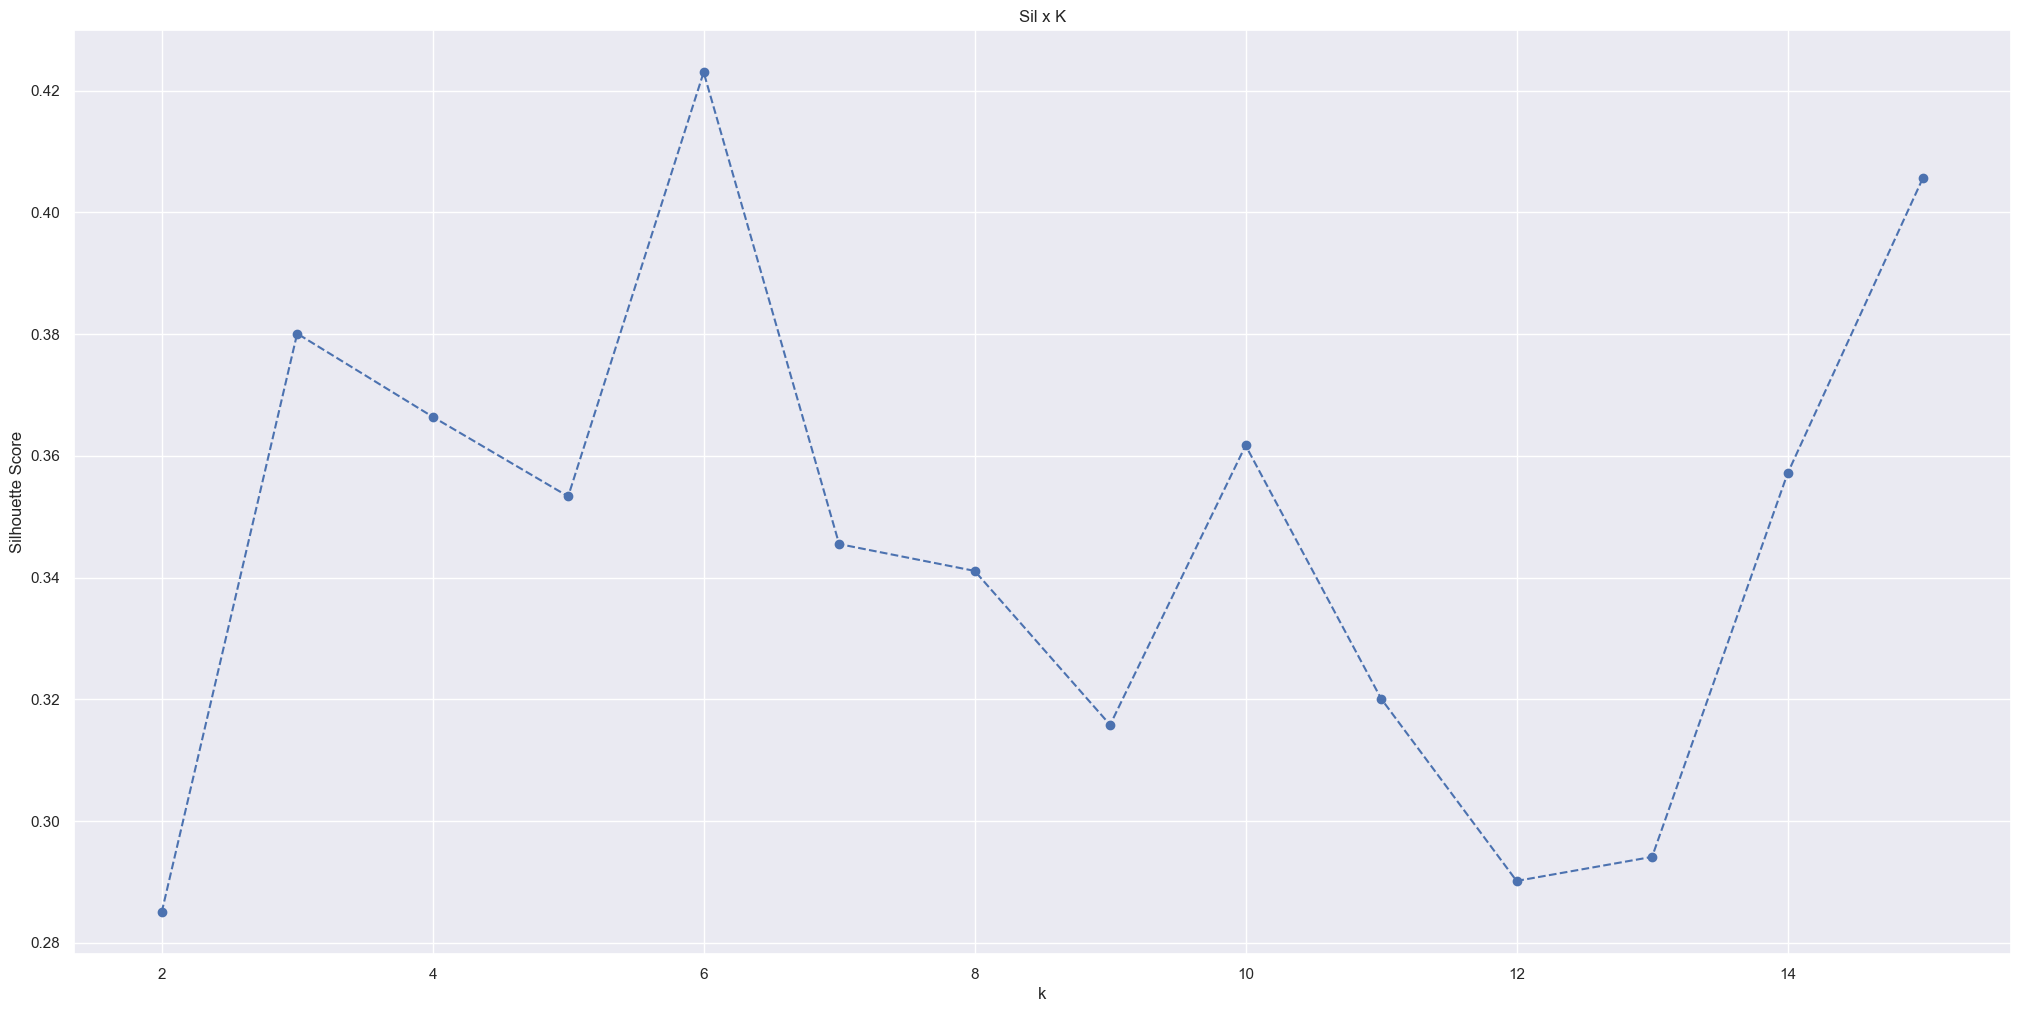

In [162]:
gmm_list = []
for k in clusters:
    # Model definition
    gmm_model = mx.GaussianMixture( n_components=k )

    # Model training
    gmm_model.fit( x )

    # Model  predict
    labels = gmm_model.predict( x )

    # Model performance
    sil = m.silhouette_score( x, labels, metric='euclidean')
    gmm_list.append( sil )
    
    
    
plt.plot( clusters, gmm_list, linestyle='--', marker='o', color='b')  
plt.xlabel( 'k');
plt.ylabel( 'Silhouette Score' );
plt.title( 'Sil x K');

### 7.2.1 GMM Dirt

In [163]:
gmm_list_D = []
for k in clusters:
    # Model definition
    gmm_model_D = mx.GaussianMixture( n_components=k )

    # Model training
    gmm_model_D.fit( x_aux )

    # Model  predict
    labels = gmm_model_D.predict( x_aux )

    # Model performance
    sil = m.silhouette_score( x_aux, labels, metric='euclidean')
    gmm_list_D.append( sil )

## 7.3 DBScan Clean

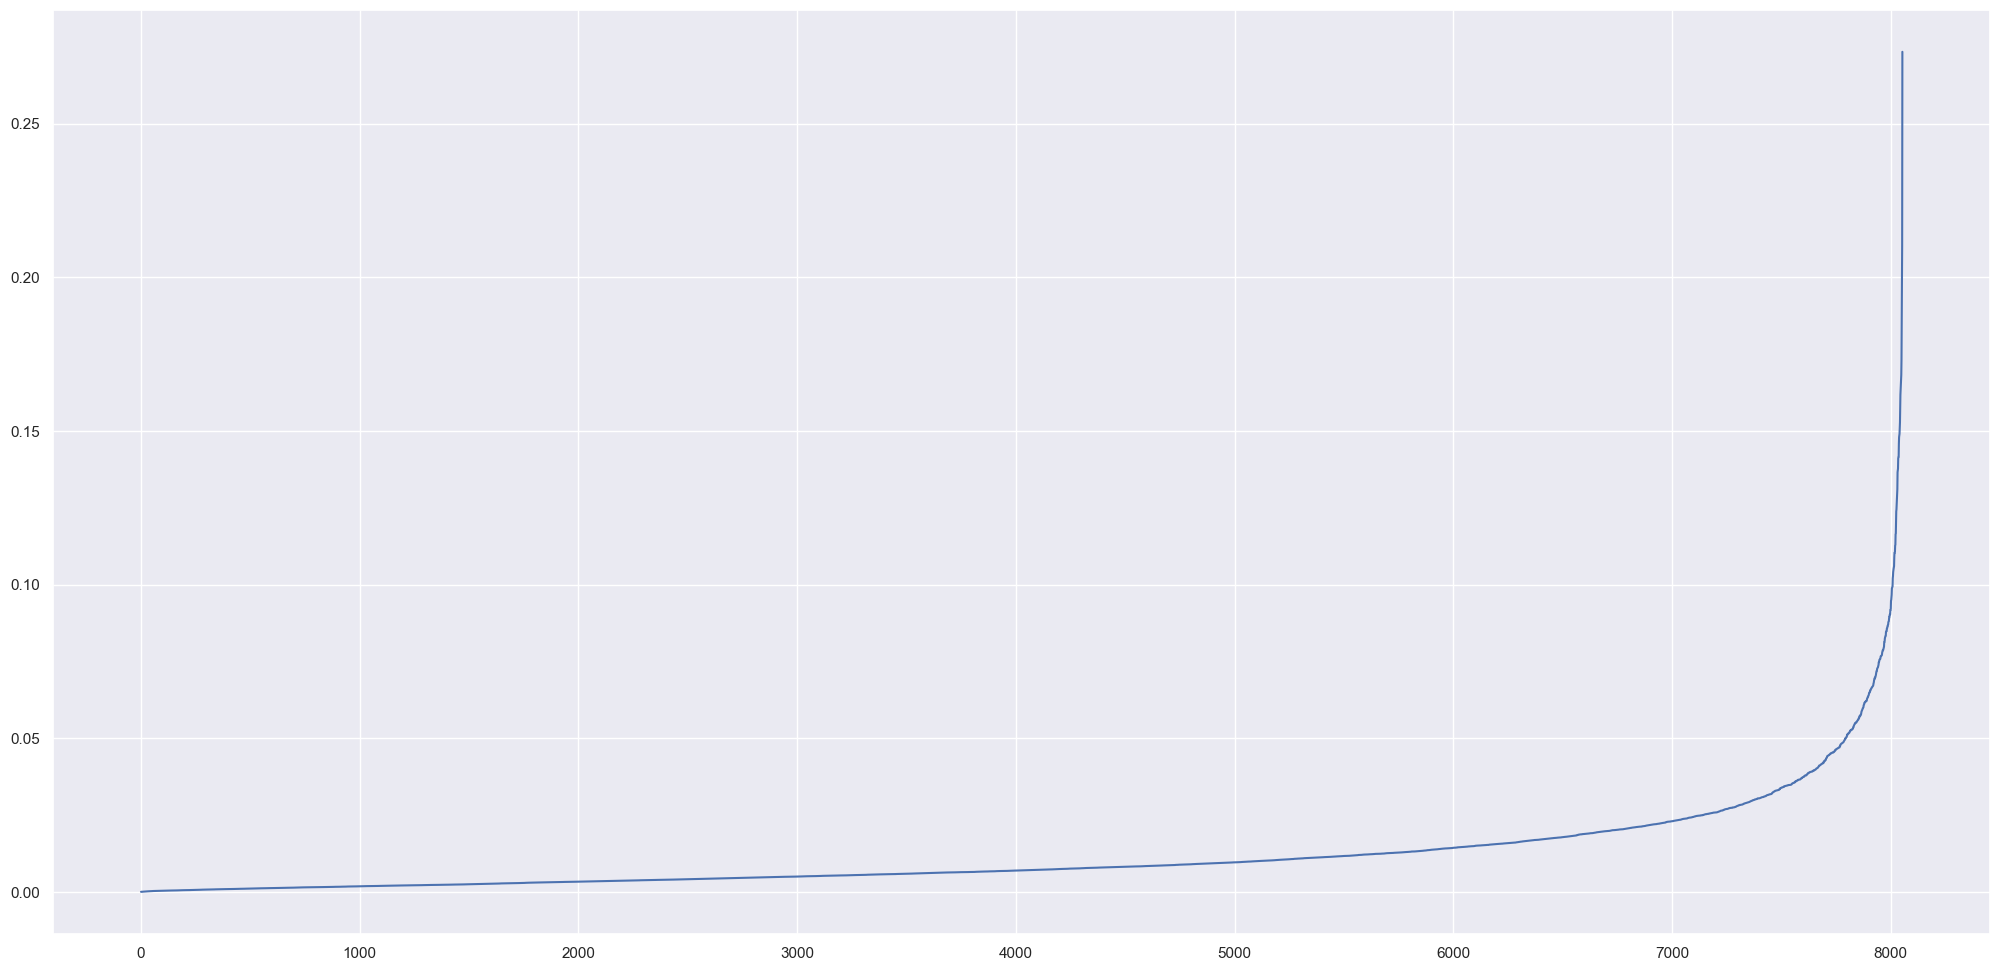

In [164]:
#eps =0.1
eps =0.2
min_samples = 20
dbscan_list = []

for k in clusters:
    # Model definition
    dbscan_model =c.DBSCAN( eps=eps, min_samples=min_samples )

    # Model training
    labels = dbscan_model.fit_predict( x )


    # Model performance
    sil = m.silhouette_score( x, labels, metric='euclidean')
    dbscan_list.append( sil )

    neigbors = NearestNeighbors( n_neighbors=min_samples ).fit( x )
    distances, indices = neigbors.kneighbors( x )
    
    

distances = np.sort( distances, axis=0 )
distances = distances[:, 1]
plt.plot( distances )

### 7.3.1 DBScan Dirt

In [165]:
eps =0.2
min_samples = 20
dbscan_list_D = []

for k in clusters:
    # Model definition
    dbscan_model_D =c.DBSCAN( eps=eps, min_samples=min_samples )

    # Model training
    labels = dbscan_model_D.fit_predict( x_aux )


    # Model performance
    sil = m.silhouette_score( x_aux, labels, metric='euclidean')
    dbscan_list_D.append( sil )


neigbors = NearestNeighbors( n_neighbors=min_samples ).fit( x_aux )
distances, indices = neigbors.kneighbors( x_aux )



## 7.4 Hierarchical Model Clean

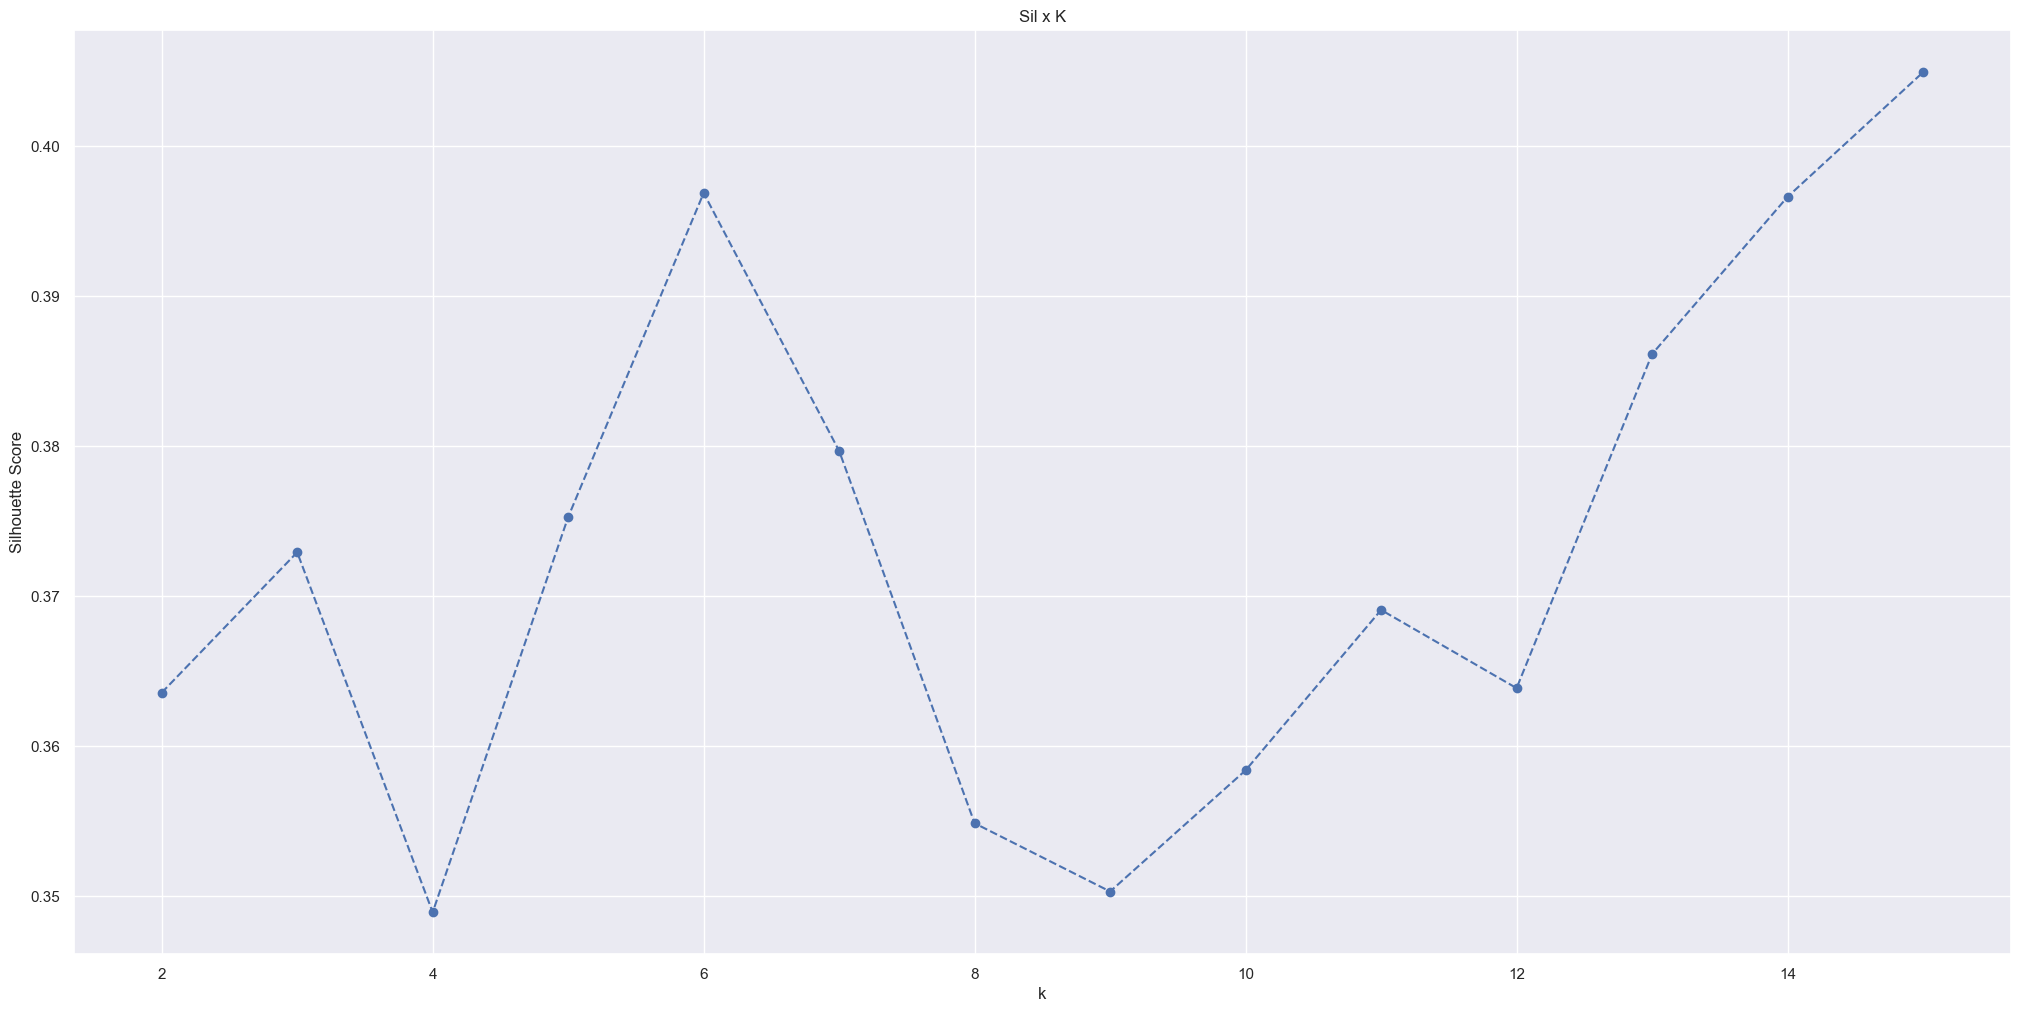

In [166]:
from  scipy.cluster import hierarchy as hc

hc_model = hc.linkage( x, 'ward')
hc_list = []
for k in clusters:
    # Model definition
    hc_model =hc.linkage( x, 'ward' )

    # Model  predict
    labels = hc.fcluster( hc_model, k, criterion='maxclust' )

    # Model performance
    sil = m.silhouette_score( x, labels, metric='euclidean')
    hc_list.append( sil )
    
    
    
plt.plot( clusters, hc_list, linestyle='--', marker='o', color='b')  
plt.xlabel( 'k');
plt.ylabel( 'Silhouette Score' );
plt.title( 'Sil x K');


### 7.4.1 Hierarchical Dirt

In [167]:
from  scipy.cluster import hierarchy as hc

hc_model_D = hc.linkage( x_aux, 'ward')

hc_list_D = []
for k in clusters:
    # Model definition
    hc_model_D =hc.linkage( x_aux, 'ward' )

    # Model  predict
    labels = hc.fcluster( hc_model_D, k, criterion='maxclust' )

    # Model performance
    sil = m.silhouette_score( x_aux, labels, metric='euclidean')
    hc_list_D.append( sil )
    
  

## 7.4 Results

In [168]:

df_results = pd.DataFrame({'KMeans': silhouette_list,
                           'Davies': davies_list,
                           'GMM' :gmm_list,
                           'HC':hc_list}
                         
                         ).T

df_results.columns = clusters
df_results.style.highlight_max( color='lightgreen', axis=1)



## Results With outliers

In [169]:
# sem Outliers
df_results = pd.DataFrame({'KMeans': silhouette_list_D,
                           'Davies': davies_list_D,
                           'GMM' :gmm_list_D,
                           'HC':hc_list_D}
                         
                         ).T

df_results.columns = clusters
df_results.style.highlight_max( color='lightgreen', axis=1)



### kmeans 2
### Davies 3
### GMM 2

# 8.0 Machine Learning

In [170]:
df8 = df7.copy()

## 8.1 Final Model

In [171]:
k=9
# modeldefinition
kmeans_model = c.KMeans( n_init=10, n_clusters=k )

# model training
kmeans_model.fit( x )

# Model predict 
labels =  kmeans_model.predict( x )



## 8.2 Cluster Validation

In [172]:
print( 'SS value: {}'.format( m.davies_bouldin_score( x, labels) ) )

SS value: 0.7959075660343476


# 9.0 Clustering Analysis

In [173]:
df9 = x.copy()
df9['cluster'] = labels
df9.head()

embedding_x  embedding_y  cluster
0     5.955133   -14.255415        4
1     7.092253    18.272326        3
2    -0.663038    18.106100        8
3    -9.038713    16.528912        5
4    -3.377858     5.476316        2

## 9.1 Visualixation Impection 

<AxesSubplot: xlabel='embedding_x', ylabel='embedding_y'>

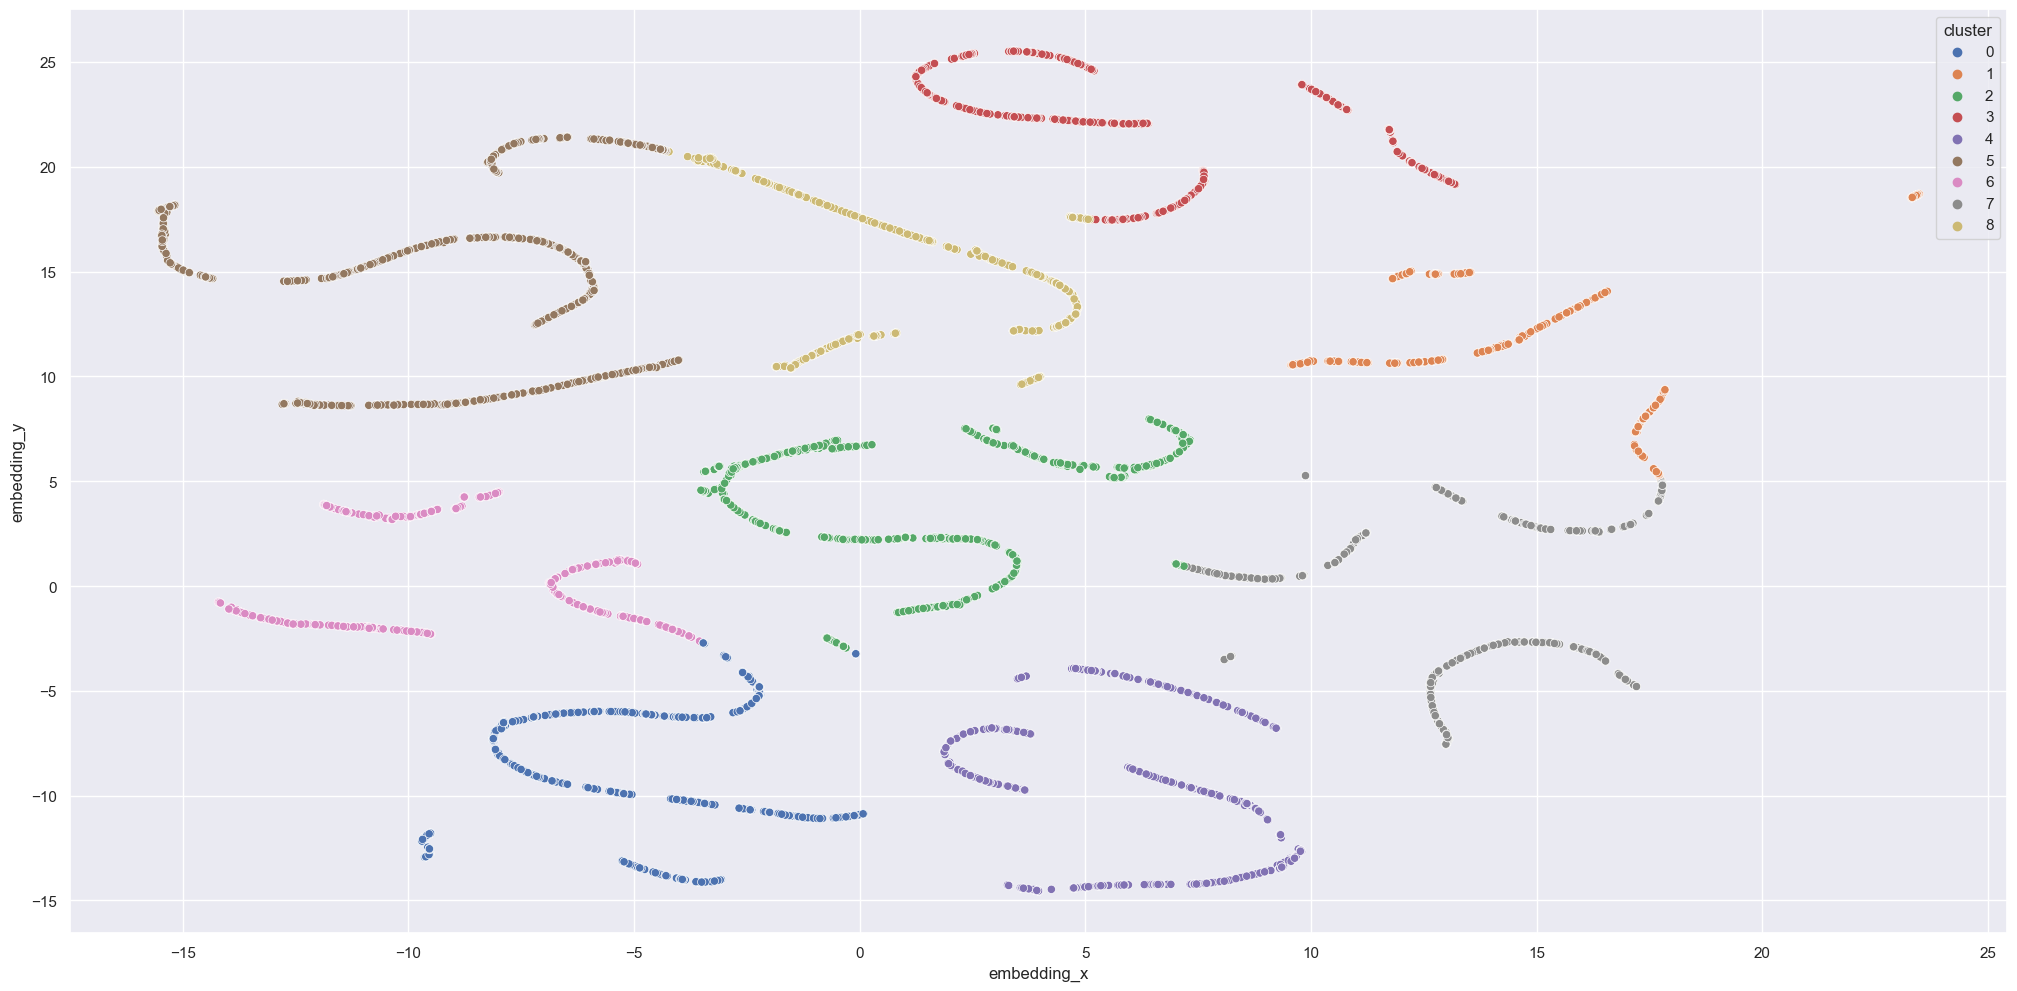

In [174]:
sns.scatterplot( x= 'embedding_x', y='embedding_y', hue='cluster', data=df9, palette='deep')

## 9.2 Cluster Profile

In [175]:
df92= cols_selected.copy()
df92['cluster'] = labels
df92.head(30)

id      balance  purchases  one_purchases  install_purchases     cash_adv  credit_limit     payments       min_pay  one_payment  purchases_trx  cash_adv_trx  gross_revenue  purchases_freq  cash_adv_freq  cluster
0   10001    40.900749      95.40           0.00              95.40     0.000000        1000.0   201.802084    139.509787            0              2             0      40.900749        0.166667       0.000000        4
1   10002  3202.467416       0.00           0.00               0.00  6442.945483        7000.0  4103.032597   1072.340217            0              0             4    3395.755780        0.000000       0.250000        3
2   10003  2495.148862     773.17         773.17               0.00     0.000000        7500.0   622.066742    627.284787            1             12             0    2495.148862        1.000000       0.000000        8
3   10004  1666.670542    1499.00        1499.00               0.00   205.788017        7500.0     0.000000      0.000000            1              1             1    1672.844183        0.083333       0.083333        5
4   10005   817.714335      16.00          16.00               0.00     0.000000        1200.0   678.334763    244.791237            1              1             0     817.714335        0.083333       0.000000        2
5   10006  1809.828751    1333.28           0.00            1333.28     0.000000        1800.0  1400.057770   2407.246035            0              8             0    1809.828751        0.666667       0.000000        5
7   10008  1823.652743     436.20           0.00             436.20     0.000000        2300.0   679.065082    532.033990            0             12             0    1823.652743        1.000000       0.000000        5
8   10009  1014.926473     861.49         661.49             200.00     0.000000        7000.0   688.278568    311.963409            1              5             0    1014.926473        0.333333       0.000000        2
9   10010   152.225975    1281.60        1281.60               0.00     0.000000       11000.0  1164.770591    100.302262            1              3             0     152.225975        0.166667       0.000000        0
10  10011  1293.124939     920.12           0.00             920.12     0.000000        1200.0  1083.301007   2172.697765            0             12             0    1293.124939        1.000000       0.000000        5
11  10012   630.794744    1492.18        1492.18               0.00     0.000000        2000.0   705.618627    155.549069            1              6             0     630.794744        0.250000       0.000000        2
12  10013  1516.928620    3217.99        2500.23             717.76     0.000000        3000.0   608.263689    490.207013            1             26             0    1516.928620        1.000000       0.000000        5
13  10014   921.693369    2137.93         419.96            1717.97     0.000000        7500.0  1655.891435    251.137986            1             26             0     921.693369        0.750000       0.000000        2
14  10015  2772.772734       0.00           0.00               0.00   346.811390        3000.0   805.647974    989.962866            0              0             1    2783.177076        0.000000       0.083333        5
16  10017  2072.074354       0.00           0.00               0.00  2784.274703        3000.0   391.974562    376.579631            0              0             3    2155.602595        0.000000       0.250000        8
17  10018    41.089489     519.00           0.00             519.00     0.000000        2500.0   254.590662     73.203221            0              8             0      41.089489        0.416667       0.000000        4
18  10019  1989.072228     504.35         166.00             338.35     0.000000       13000.0  1720.837373    744.613395            1              9             0    1989.072228        0.666667       0.000000        5
20  10021  2016.684686     176.68           0.00             176.

In [176]:
# Number of customer
df_cluster = df92[['id', 'cluster']].groupby( 'cluster' ).count().reset_index()
df_cluster['perc_customer'] = 100 * ( df_cluster['id'] / df_cluster['id'].sum() )
df_cluster['perc_customer'] = df_cluster['perc_customer'].map( '{:.2f}%'.format)

# Avg  Balance
df_avg_balance = df92[['balance', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_balance, how='inner', on='cluster' )
df_cluster['balance'] = df_cluster['balance'].map( '${:,.2f}'.format)

# Agv Purchases
df_avg_purchases= df92[['purchases', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_purchases, how='inner', on='cluster' )
df_cluster['purchases'] = df_cluster['purchases'].map( '${:,.2f}'.format)

# Agv One Purchases
df_avg_one_purchases= df92[['one_purchases', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_one_purchases, how='inner', on='cluster' )
df_cluster['one_purchases'] = df_cluster['one_purchases'].map( '${:,.2f}'.format)

# Agv Install Purchases
df_avg_install_purchases= df92[['install_purchases', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_install_purchases, how='inner', on='cluster' )
df_cluster['install_purchases'] = df_cluster['install_purchases'].map( '${:,.2f}'.format)

# Agv Install Purchases TRX
df_avg_install_purchases_trx= df92[['purchases_trx', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_install_purchases_trx, how='inner', on='cluster' )


# Agv Purchase Frequency
df_avg_purchases_freq= df92[['purchases_freq', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_purchases_freq, how='inner', on='cluster' )

# Agv Payments
df_avg_payments= df92[['payments', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_payments, how='inner', on='cluster' )
df_cluster['payments'] = df_cluster['payments'].map( '${:,.2f}'.format)

# Agv Minimum Payments
df_avg_min_pay= df92[['min_pay', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_min_pay, how='inner', on='cluster' )
df_cluster['min_pay'] = df_cluster['min_pay'].map( '${:,.2f}'.format)

# # Agv One Payments
# df_avg_one_payment= df92[['one_payment', 'cluster']].groupby( 'cluster' ).mean().reset_index()
# df_cluster = pd.merge( df_cluster, df_avg_one_payment, how='inner', on='cluster' )
# #df_cluster['one_payment'] = df_cluster['one_payment'].map( '${:,.2f}'.format)

# Agv Credit Limit
df_avg_credit_limit= df92[['credit_limit', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_credit_limit, how='inner', on='cluster' )


# Agv Cash ADV
df_avg_cash_adv= df92[['cash_adv', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_cash_adv, how='inner', on='cluster' )
df_cluster['cash_adv'] = df_cluster['cash_adv'].map( '${:,.2f}'.format)

# Agv Cash ADV TRX
df_avg_cash_adv_trx= df92[['cash_adv_trx', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_cash_adv_trx, how='inner', on='cluster' )

# Agv Cash Advance Frequency
df_avg_cash_adv_freq= df92[['cash_adv_freq', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_cash_adv_freq, how='inner', on='cluster' )


# Agv Gross Revenue
df_avg_gross_revenue= df92[['gross_revenue', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_gross_revenue, how='inner', on='cluster' )
df_cluster['gross_revenue'] = df_cluster['gross_revenue'].map( '${:,.2f}'.format)

df_cluster


cluster    id perc_customer    balance  purchases one_purchases install_purchases  purchases_trx  purchases_freq   payments    min_pay  credit_limit   cash_adv  cash_adv_trx  cash_adv_freq gross_revenue
0        0   845        10.49%    $168.53  $1,048.96       $527.78           $521.83      16.287574        0.620952  $1,341.66    $197.11   4224.047337    $208.57      0.743195       0.040916       $174.79
1        1   605         7.51%      $5.61    $196.15        $60.75           $135.41       5.568595        0.406378    $392.32     $58.80   3273.752066     $28.69      0.148760       0.012626         $6.47
2        2  1220        15.15%    $781.59    $820.34       $531.00           $289.63      12.936066        0.458517  $1,355.30    $473.03   2974.312386    $647.85      2.597541       0.125352       $801.03
3        3   768         9.54%  $4,428.28    $688.18       $467.49           $220.74      10.393229        0.361077  $1,860.80  $1,577.22   6960.227273  $1,959.61      5.252604       0.247134     $4,487.07
4        4   868        10.78%     $65.14    $585.42       $225.42           $360.03      11.173963        0.634460    $856.64    $144.07   3953.234243     $84.51      0.330645       0.018981        $67.67
5        5  1422        17.66%  $1,753.50    $649.31       $394.21           $255.24      10.754571        0.382463  $1,364.94    $992.43   3564.802029    $955.07      3.669480       0.173766     $1,782.15
6        6   748         9.29%    $594.74  $1,059.76       $642.61           $417.18      14.328877        0.483636  $1,458.96    $381.94   3499.442959    $418.26      2.045455       0.104921       $607.29
7        7   792         9.83%    $139.76    $565.87       $279.25           $287.59      11.089646        0.575576    $839.11    $182.41   3336.279461    $122.18      0.648990       0.032708       $143.42
8        8   786         9.76%  $2,076.21    $708.79       $441.07           $267.76      12.064885        0.402309  $1,432.86  $1,009.60   4113.295165  $1,188.55      4.029262       0.189351     $2,111.87

In [187]:
## Id = Codigo indentificador unico para cada cliente.

## Balance =  Quanto eu ja gastei no cartao de credito ( a fatura)
## Possiveis Outliers

## Purchases = Valor gasto no catao nos ultimos 6 meses( a soma de todos os valores quando a pessoa passou o cartao )

## Purchase One Off = Soma de todas as compras pagas em 1x no cartao nos ultimos 6 meses.

## Installment Purchases = Soma de todas compras pagas em mais de 1x no cartao de credito nos ultimos 6 meses.
## ( Categoria )

## Cash Advance = Valor do saque do limite do cartao de credito acumulado dos ultimos 6 meses.

## Purchase Frequency =  Um valor de 0 e 1 que indentifica a frequencia de compras do cliente.

## Cash Advance Frequency = A frequencia com o cliente faz retiradas de dinheiro do seu cartao de credito.

## Cash Advance TRX = Quantidade de saques da contas do cartao de credito.

## Purchase TRX =  A quantidade de compras realizadas no cartao de credito.

## Credit Limit = O valor limite do cartao de credito do cliente.

## Payments = O valor pago alem do minimo da fatura ( nao necessariamente a fatura total )
# Ex:
# Fatura total = 300
# pagamento minimi = 2000
# Pagamento efetivo = 2500

#Payment = 500
# Minimum Payment =  2000
# pagamento total = Payment + Minimum Payment = 2500

## Minimum Payments = Valor minimo pago da fatura.

## Tenure =  O tempo de posse do cartao em messes( tempo em que a pessoa e cliente do banco )



# 10.0 EDA - Insight Reports

In [188]:
df10 = df92.copy()

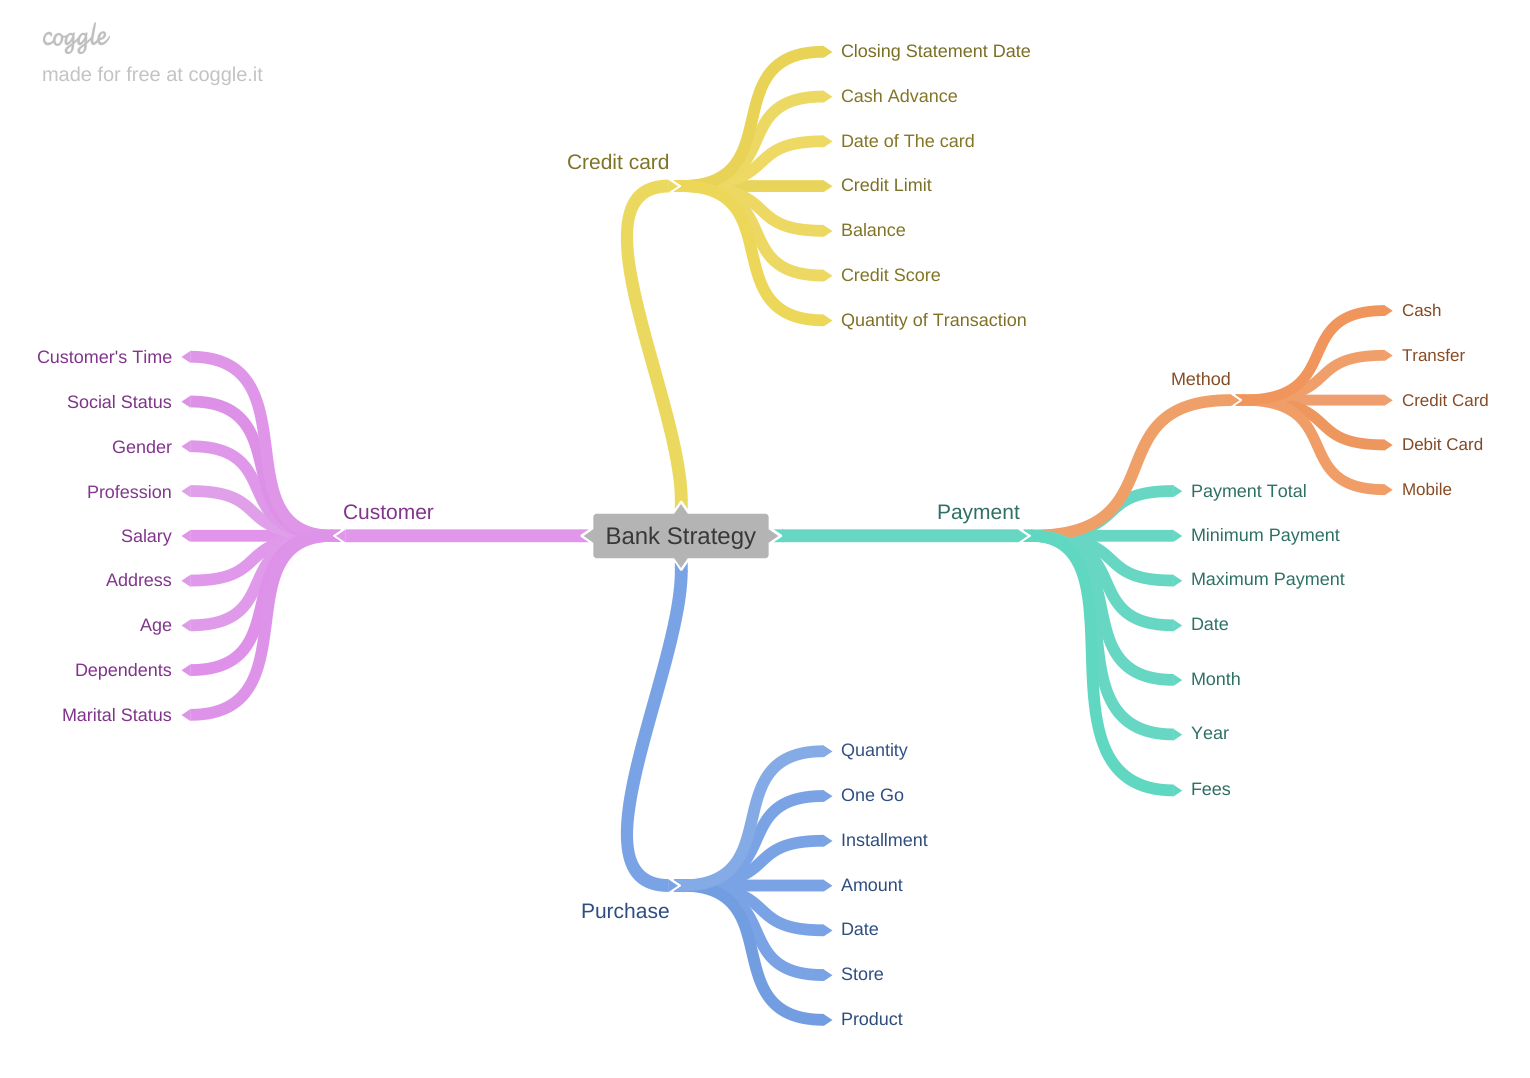

In [189]:
Image( '/Users/adriele/Documents/repos/pa006/image/mind_map.png' )


Customer Hypothesis
- 1. Customers that has a salary over 8k pays the total balance.
- 2. 60% of database are women.
- 3. Single customer buy more.
- 4. Customer the pays the minimum payment are customer under 21 years old.


Credit Card Hypothesis
- 1. The customer pays the full balance for the  credit card that has closing date after day 5 of each month.
- 2. Customer over 40 years old has more transaction on the card.
- 3. Customer who has more balance is who purchase more products.
- 4. who often get the cash advance pays the minimum payment.
- 5. 90% of customers using the credit card.
- 6. 30% of Customers just use card to borrow cash.

Payments Hypothesis
- 1.  who pays the credit card by mobile pays the full balance.
- 2. Customers who has the maximum payments are who has credit limit over 5k.
- 3. Customers that does the full payment are customers who has a credit score over 800points.
- 4. 30% 30% of customers from database buying in installment method.




Purchase Hypothesis
- 1. Customers who has over than 5 dependents has purchases by installment.
- 2. Customer who has pays one go are who doesn't pays the minimum payment.
- 3. 20% of Customers pays the purchases in installment.
- 4. 10% of cutomers takes the cash advance

### H1.0 Customer who has more balance is who purchase more products.

False - The purchase is lower than balance, probably it is accumulated from others months

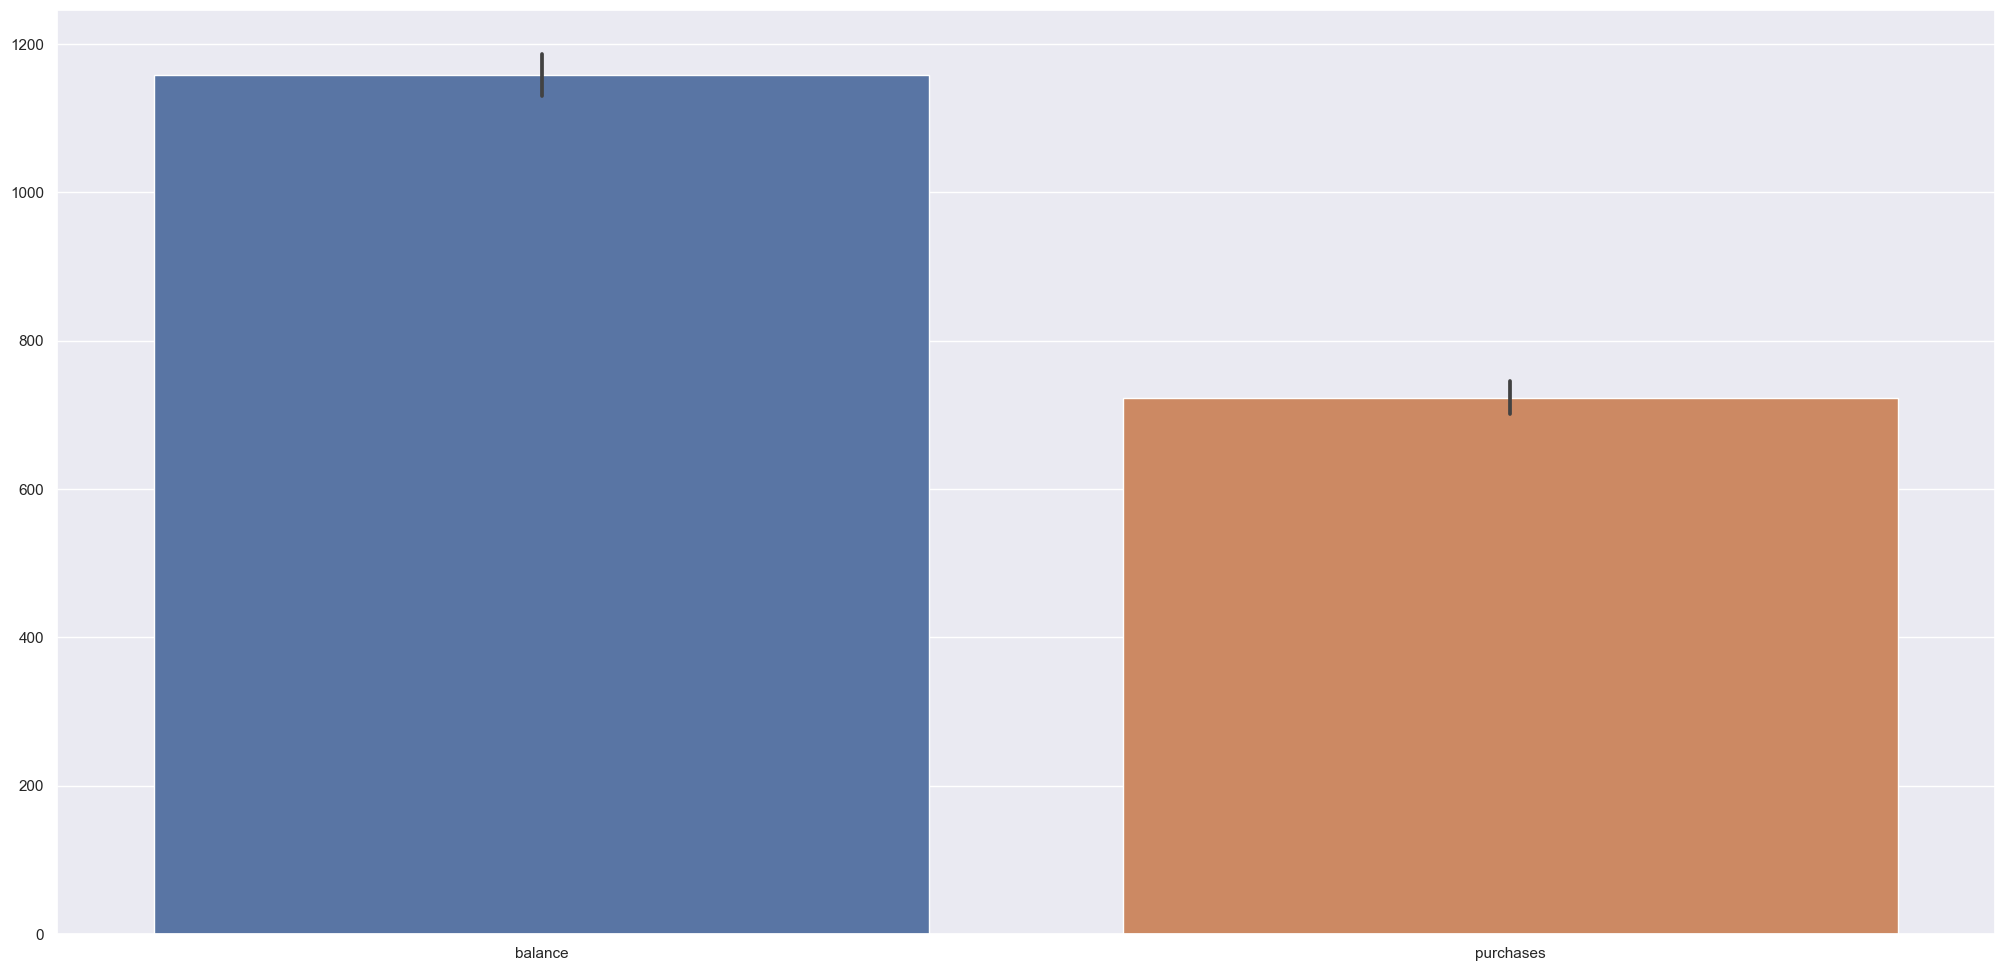

In [190]:
a = df10[['balance', 'purchases']].groupby('balance').sum().reset_index()
sns.barplot ( a );

### H2.0 Customer who often get the cash advance pays the minimum payment.
True 

<AxesSubplot: ylabel='Count'>

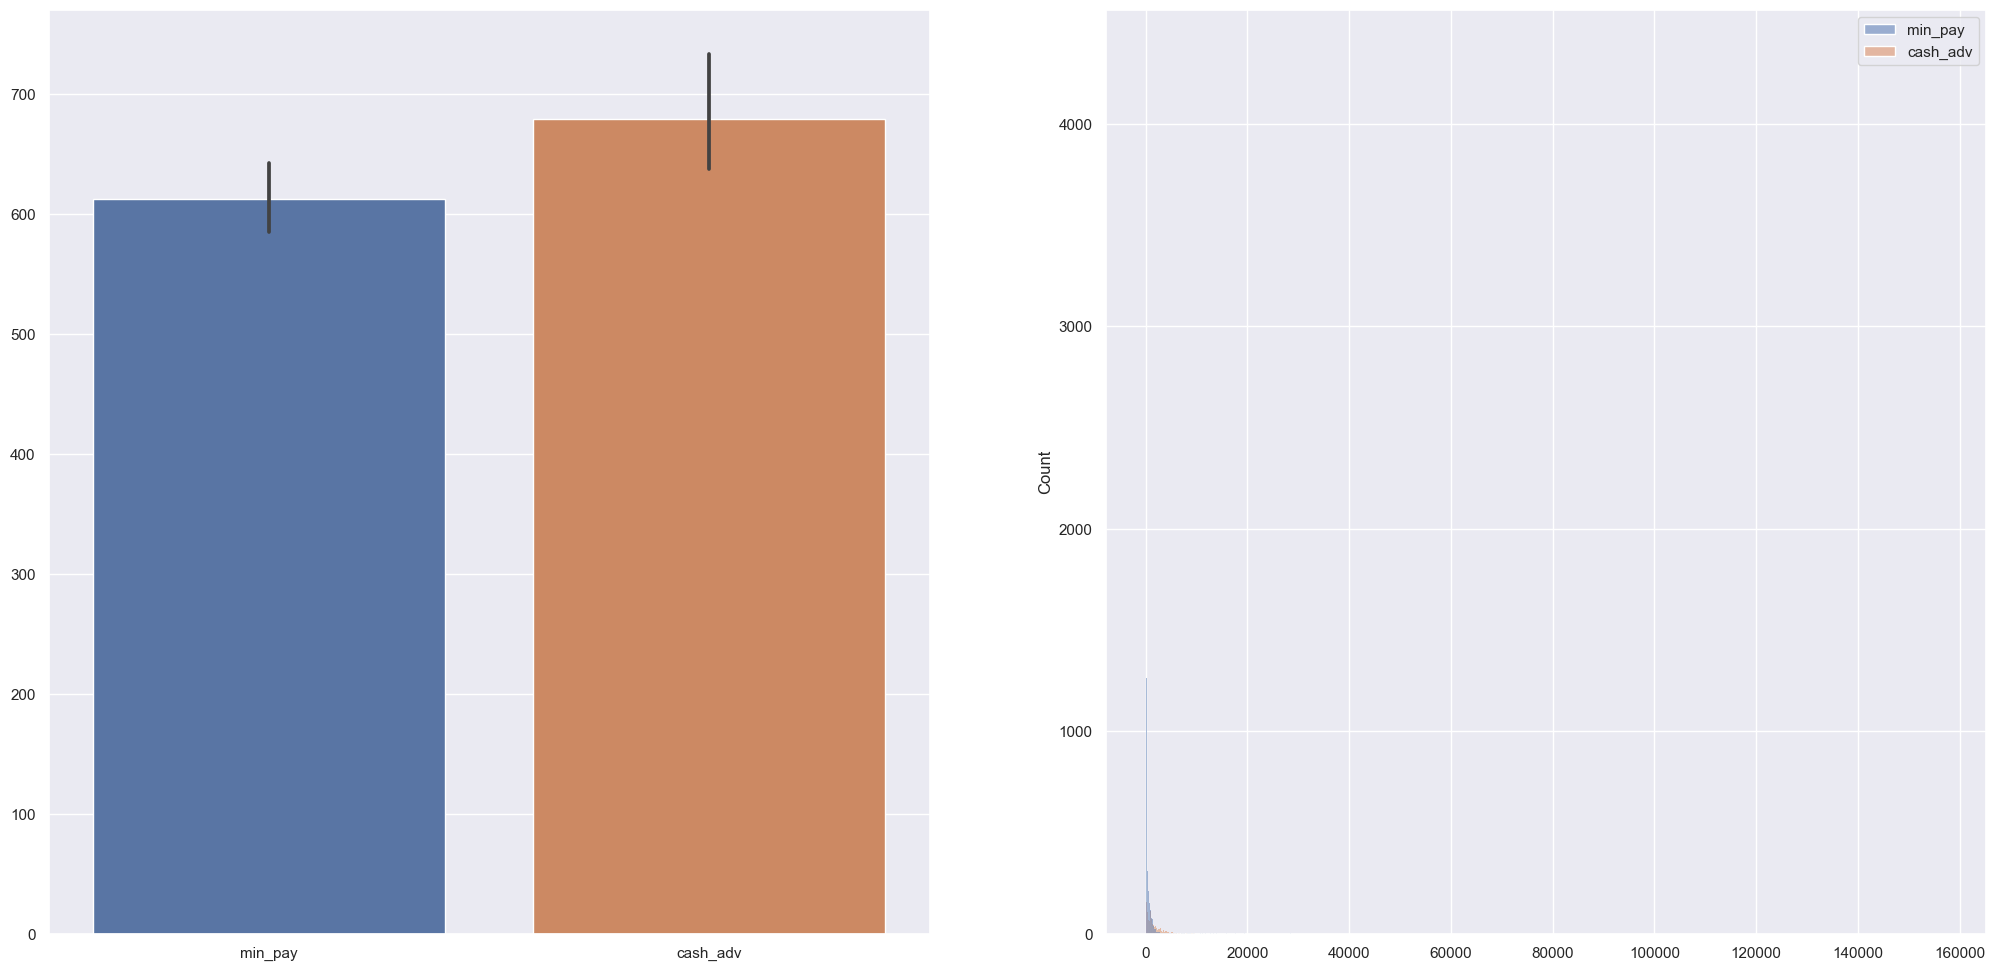

In [191]:
h2 = df10[['cash_adv', 'min_pay']].groupby('min_pay').sum().reset_index()
plt.subplot (1, 2, 1)
sns.barplot( h2 )

plt.subplot (1, 2, 2)
sns.histplot ( h2 )



### H3. 90% of customers using the credit card.
False - Just 76.29% Are using the credit card.

In [192]:

h3 = len(df10[df10['purchases_trx']==0])
h33 = len(df10[df10['purchases_trx']>=1])
total_customers = len( df10 )

print(f"Custumers not Using the credit Card {len(df10[df10['purchases_trx']==0])}")
print(f"Custumers Using the credit Card  {len(df10[df10['purchases_trx']>=1])}")
print( '% of Custumer USING the Credit Card: {: .2f}%'.format(  100 * h33 / total_customers ) ) 
print( '% of Custumer NOT Using the Credit Card: {: .2f}%'.format(  100 * h3 / total_customers ) ) 



Custumers not Using the credit Card 1875
Custumers Using the credit Card  6179
% of Custumer USING the Credit Card:  76.72%
% of Custumer NOT Using the Credit Card:  23.28%


### h4. 30% of customers from database buying in installment method.

- False. 54% of custumers are buying on Intalmente method.

In [201]:
h4 = len(df10[df10['one_purchases']>=1])
h44 = len(df10[df10['install_purchases']>=1])
total_customers = len( df10 )

print( '% of Custumer buying One Go: {: .2f}%'.format(  100 * h4 / total_customers ) ) 
print( '% of Custumerbuying Installment: {: .2f}%'.format(  100 * h44 / total_customers ) ) 




selected_cols = ['one_purchases', 'install_purchases']
cluster_data = df10.loc[:, selected_cols]


# def distributions(df10):
#     fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))
#     sns.distplot(df10["one_purchases"], ax=ax1)
#     sns.distplot(df10["install_purchases"], ax=ax2)
#     plt.tight_layout()
    
    
    
    
#distributions(cluster_data)

% of Custumer buying One Go:  50.20%
% of Custumerbuying Installment:  55.14%


### H5 - 10% of cutomers takes the cash advance.
False - 46.95% of Customers are taking the cash adv.

In [195]:
h3 = len(df10[df10['cash_adv']==0])
h33 = len(df10[df10['cash_adv']>=1])
total_customers = len( df10 )


print(f"Custumers Taking the Cash Advance  {len(df10[df10['cash_adv']>=1])}")
print(f"Custumers NOT Taking the Cash Advance {len(df10[df10['cash_adv']==0])}")
print( '% of Custumer Taking the Cash Advance: {: .2f}%'.format(  100 * h33 / total_customers ) ) 
print( '% of Custumer NOT Taking the Cash Advance: {: .2f}%'.format(  100 * h3 / total_customers ) ) 



Custumers Taking the Cash Advance  3663
Custumers NOT Taking the Cash Advance 4391
% of Custumer Taking the Cash Advance:  45.48%
% of Custumer NOT Taking the Cash Advance:  54.52%


### H6 - 30% of Customers just use card to borrow cash.
False - 21% use the card to borrow cash

% Custumers just use the card for Borrow Money :  1664.00
% Custumers that Borrow Money and Use for Purchases :  5517.00
% Borrow Money:  20.66%
% Purchase + Borrow Money:  68.50%


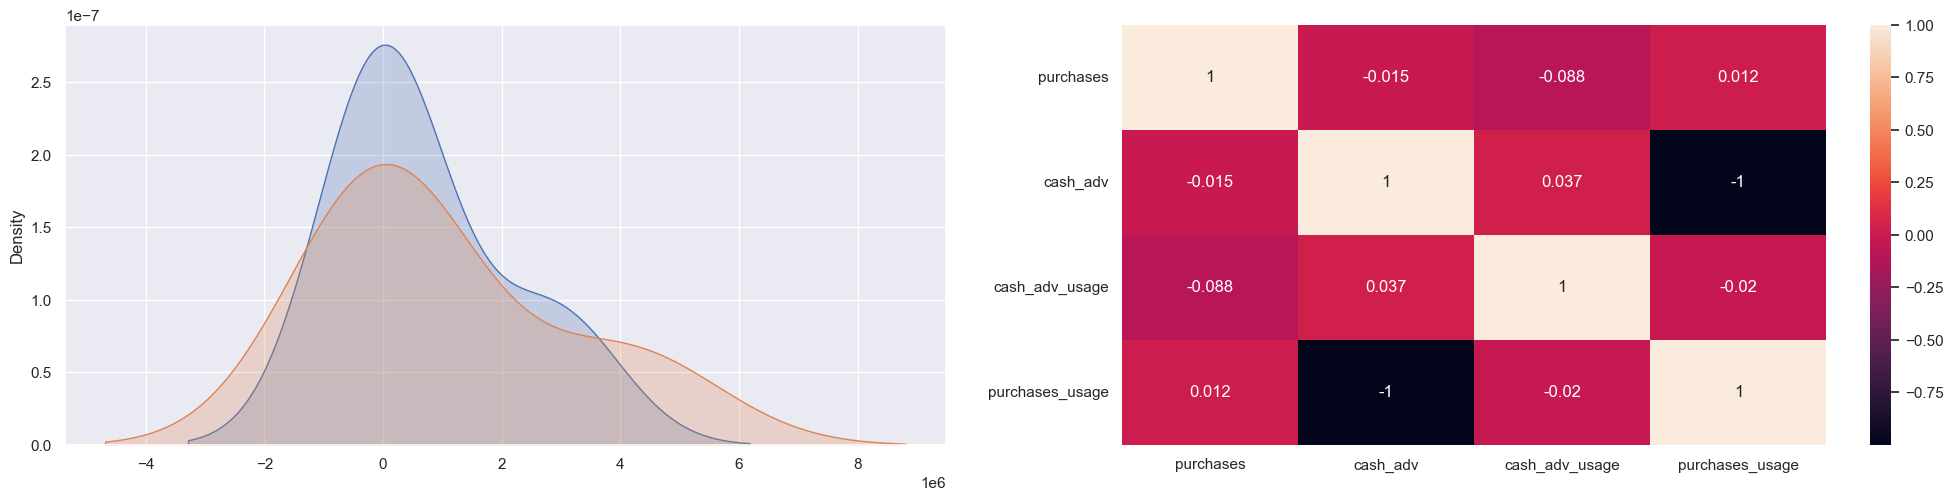

In [196]:

h6 = df10[['purchases', 'cash_adv']].groupby( 'purchases' ).sum().reset_index()
total_customers = len( df10 )
h6['cash_adv_usage'] = h6['cash_adv'].apply( lambda x:  0 if x == 0  else 1)
h6['purchases_usage'] = h6['purchases'].apply( lambda x:  0 if x == 0  else 1)

h = len(h6[h6['cash_adv_usage']==1])
h33 = len(h6[h6['purchases_usage']==1])

plt.subplot( 2, 2, 1 )
sns.kdeplot( h6 [(h6['purchases_usage'] == 0) & (h6['cash_adv_usage'] == 1)].sum(), label='Bow', shade=True )
sns.kdeplot( h6 [(h6['purchases_usage'] == 1) & (h6['cash_adv_usage'] == 0)].sum(), label='Bow', shade=True )

plt.subplot (2, 2, 2)
sns.heatmap( h6.corr (method = 'pearson'), annot = True)

print( '% Custumers just use the card for Borrow Money : {: .2f}'.format( h6['cash_adv'].apply( lambda x:  0 if x == 0  else 1).sum() ) )
print( '% Custumers that Borrow Money and Use for Purchases : {: .2f}'.format( h6['purchases'].apply( lambda x:  0 if x == 0  else 1).sum() ) )
print( '% Borrow Money: {: .2f}%'.format(  100 * h / total_customers ) )
print( '% Purchase + Borrow Money: {: .2f}%'.format(  100 * h33 / total_customers ) ) 


# Model Results

In [198]:

# Percentage Customers
df_return = df92[['id', 'cluster']].groupby( 'cluster' ).count().reset_index()
df_return['perc_customer'] = 100 * ( df_return['id'] / df_return['id'].sum() )
df_return['perc_customer'] = df_return['perc_customer'].map( '{:.2f}%'.format)

# Gross Revenue Total by Cluster
df_gross_revenue= df92[['gross_revenue', 'cluster']].groupby( 'cluster' ).sum().reset_index()
df_return = pd.merge( df_return, df_gross_revenue, how='inner', on='cluster' )
df_return['gross_revenue'] = df_return['gross_revenue'].map( '${:,.2f}'.format)

# Percentage Retun by Cluster
df_return['perc_return'] = 100 * ( df_gross_revenue['gross_revenue'] / df_gross_revenue['gross_revenue'].sum() )
df_return['perc_return'] = df_return['perc_return'].map( '{:.2f}%'.format) 


df_return.head(10)




cluster    id perc_customer  gross_revenue perc_return
0        0   845        10.49%    $147,696.62       1.57%
1        1   605         7.51%      $3,916.54       0.04%
2        2  1220        15.15%    $977,251.48      10.40%
3        3   768         9.54%  $3,446,067.07      36.68%
4        4   868        10.78%     $58,741.55       0.63%
5        5  1422        17.66%  $2,534,214.51      26.97%
6        6   748         9.29%    $454,250.51       4.83%
7        7   792         9.83%    $113,590.54       1.21%
8        8   786         9.76%  $1,659,927.49      17.67%

# 11.0 Deploy to Production